[![author](https://github.com/gustavopierre/data_science_portfolio/blob/master/author-gustavopierre.png?raw=true)](https://www.linkedin.com/in/gustavo_pierre) [![](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/) [![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](https://github.com/gustavopierre/data_science_portfolio/issues)

<p align="center">
  <img src="https://github.com/gustavopierre/The_Patient_with_COVID19_Will_Go_to_UCI_or_Not/blob/main/pexels-pixabay-263402.jpg?raw=true" alt="Emergency write in red" >
</p>

# **Predizendo se um Paciente de COVID-19 Vai para a UTI ou Não**

## **Resumo**
O presente trabalho prepara os dados anonimizados de pacientes com COVID-19 fornecidos pelo Hospital Sírio-Libanês e testa modelos de aprendizado de máquina usando esses dados para, a visão das métricas obtidas, predizer se pacientes novos vão ou não utilizar a UTI do hospital a fim de preparar o sistema de saúde do hospital, evitando o colapso definido pela necessidade de leitos de UTI superior à sua capacidade. Sendo assim apresentada como uma solução ao desafio proposto pelo Hospital no Kaggle e como um aplicativo web.

## **Introdução**
O [Hospital Sírio-Libanês](https://www.hospitalsiriolibanes.org.br/institucional/Paginas/default.aspx) surgiu em 1921, criado por um grupo de imigrantes da comunidade sírio-libanesa no Brasil que se reuniu a fim de concretizar um projeto que retribuisse a acolhida calorosa que receberam no país. Sendo assim criada a Sociedade Beneficiente de Senhoras, entidade filantrópica que até hoje é a mantenedora da instituição. Ao longo dos anos, vem acumulando conquistas pioneiras e, atualmente, é um centro de referência internacional em saúde. A instituição conta com unidades em São Paulo e Brasília.

Por volta de maio de 2020, o Hospital lançou um desafio na comunidade online de cientistas de dados e profissionais de aprendizado de máquina, chamada [Kaggle](https://www.kaggle.com/), a fim de predizer se pacientes confirmados com COVID-19 vão ou não para a UTI, baseados em dados clínicos e demográficos. Isso permitirá preparar o sistema de saúde do hospital evitando, desta forma, o colapso definido pela necessidade de leitos de UTI superior à sua capacidade. 

Este trabalho visa, com base nos dados passados fornecidos de pacientes com COVID-19 do hospital, analisá-los, explorá-los e aplicar neles modelos de aprendizado de máquina, verificando a acurácias e outras métricas de avaliação dos resultados, chegando a um modelo que possa ser utilizado para a predição de novos pacientes. Este modelo será submetido como solução no desafio do Kaggle. Será também implementado e disponibilizado na web um aplicativo para, com base em dados de novos pacientes prever se os pacientes com COVID-19 irão ou não para a UTI.

Este projeto está estruturado da seguinte forma: informações detalhadas do [desafio criado pela instituição no Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) e dos dados disponilbilizados, a configuração inicial do ambiente, a preparação dos dados para a análise exploratória, a própria análise exploratória, os modelos de aprendizados de máquina utilizados para gerar as predições e a análise destes modelos, chegando em um modelo com a melhor métrica. É apresentado, também, sugestões de trabalhos futuros a serem realizados, a fim de buscar a melhoria das soluções apresentadas.

A linguagem de programação utilizada será o Python e, para fins didáticos e contra os preceitos das boas práticas de programação estabelecidos pela documentação da linguagem ([PEP8](https://pep8.org/)), a importação de módulos e definição de funções se farão no decorrer do projeto, conforme a necessidade. No entanto, o uso de documentação das funções baseadas na [PEP257](https://www.python.org/dev/peps/pep-0257/) será utilizada.

Também para fins didáticos, as referências utilizadas neste projeto estão linkadas no texto, quando possívek, ou no final deste projeto.



## **Desafio no Kaggle e os Dados Fornecidos**
Por volta de maio de 2020, o Hospital Sírio-Libanês postou um desafio no kaggle. As informações detalhadas podem ser obtidas no [site do desafio no kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19). Aqui vamos apresentar as informações mais relevantes:
- Há urgência na obtenção de dados precisos para prever e preparar melhor os sistemas de saúde e evitar colapsos, definido pela necessidade de leitos de UTI acima da capacidade (assumindo que recursos humanos, EPIs e profissionais estejam disponíveis), utilizando dados clínicos individuais - no lugar de dados epidemiológicos e populacionais.
- Tarefa 01 - Prever admissão na UTI de casos confirmados de COVID-19.
Com base nos dados disponíveis, é viável prever quais pacientes precisarão de suporte em unidade de terapia intensiva?
O objetivo é prover os hospitais com a resposta mais precisa, para que os recursos da UTI possam ser arranjados ou a transferência do paciente possa ser agendada.
- Tarefa 02 - Prever a NÃO admissão à UTI de casos COVID-19 confirmados.
Com base na subamostra de dados disponibilizados, é viável prever quais pacientes precisarão de suporte de unidade de terapia intensiva?
O objetivo é fornecer aos hospitais locais e temporários uma resposta boa o suficiente, para que os médicos de linha de frente possam dar alta com segurança e acompanhar remotamente esses pacientes.
- Os dados disponibilizados estão no formato XLS (Microsoft excel) e possui as seguintes propriedades:

> 1. campo (feature) ICU - Intensive Care Unit -  é o rótulo que informa se o paciente está na UTI (ICU=1) ou não (UCI=0);
>2. feature WINDOW - janela - cuidadosamente foram incluídos cenários reais com janelas de eventos e dados disponíveis. Ou seja, cada paciente tem registros com dados de em cada janela em ordem cronológica. As janelas são:

| WINDOW | Descrição |
| ------ | -------- |
| 0-2| De 0 a 2 horas da admissão|
| 2-4| De 2 a 4 horas da admissão|
| 4-6| De 4 a 6 horas da admissão|
| 6-12| De 0 a 2 horas da admissão|
| Above-12| Acima de 12 horas da adimissão|

>3. Os dados dos pacientes que estão na UTI (ICU=1) não devem ser utilizados para a predição, pois não se sabe a ordem dos eventos, ou seja, talvez o paciente tenha ido para UTI antes dos resultados serem obtidos.

<img src="https://github.com/gustavopierre/The_Patient_with_COVID19_Will_Go_to_UCI_or_Not/blob/main/inbox_1591620_b1bc424df771a4d2d3b3088606d083e6_Timeline%20Example%20Best.png?raw=true" alt="Patient to ICU in WINDOW above 12" width="max"><br>
<img src="https://github.com/gustavopierre/The_Patient_with_COVID19_Will_Go_to_UCI_or_Not/blob/main/inbox_1591620_77ca2b4635bc4dd7800e1c777fed9de1_Timeline%20Example%20No.png?raw=true" alt="Patient in ICU at second WINDOW" width="max"><br>

>4. Este arquivo contém os dados anonimizados do Hospital Sírio-Libanês de São Paulo e Brasília. Todos os dados foram anonimizados seguindo as melhores práticas e recomendações internacionais.
>5. Os dados foram limpos e escalados por coluna para se ajustar entre -1 e 1.
>6. Existem 03 features de informações demográficas dos pacientes: AGE_ABOVE65 (se possui ou não idade maior que 65 anos), AGE_PERCENTIL (que pode possuir um dos seguintes valores: '60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th', '30th' ou 'Above 90th') e GENDER (gênero, com valores 0 - homem ou 1 - mulher).
>7. Existem 09 features de doenças previamente agrupadas do paciente: DISEASE GROUPING 1, DISEASE GROUPING 2, DISEASE GROUPING 3, DISEASE GROUPING 4	DISEASE GROUPING 5, DISEASE GROUPING 6, HTN, IMMUNOCOMPROMISED	e OTHER - sem mais detalhes e feito assim para anonimizar o paciente.
>8. Existem 36 features de resultados de exames de sangue.
>9. Existem 06 features de sinais vitais
>10. Existem, no total, 54 features, expandidas, quando pertinente, para média (mean), máximo (max), mínimo (min), differença (diff) e diferença relativa (relative diff), onde: 
$$
diff = max - min 
$$

$$
relative\,diff = \frac{diff}{mean}
$$
- Deve ser submetido como solução para o desafio um notebook contendo todo o ciclo de data preparação, criação do modelo e avaliação. O notebook é um aplicativo local ou online, de código aberto, que permite criar e compartilhar documentos que contêm código ativo, equações, visualizações e texto narrativo.
- Dados faltantes: 
>1. Problema - Um dos maiores desafios de trabalhar com dados de saúde é que a taxa de amostragem varia entre os diferentes tipos de medições. Por exemplo, os sinais vitais são coletados com mais frequência (geralmente de hora em hora) do que os laboratórios de sangue (geralmente diariamente). 
>2. Dica: É razoável supor que um paciente que não tenha uma medida registrada em uma janela de tempo esteja clinicamente estável, podendo apresentar sinais vitais e exames laboratoriais semelhantes às janelas vizinhas. Portanto, pode-se preencher os valores ausentes usando a entrada seguinte ou anterior. Atenção aos problemas de multicolinearidade e variância zero nesses dados ao escolher o algoritmo.

- Quanto mais cedo melhor!
>1. Problema: A identificação precoce dos pacientes que desenvolverão um curso adverso da doença (e precisam de cuidados intensivos) é a chave para um tratamento adequado (salvar vidas) e para gerenciar leitos e recursos.
>2. Dica: Enquanto um modelo preditivo usando todas as janelas de tempo provavelmente produzirá uma maior precisão, um bom modelo usando apenas o primeiro (0-2) provavelmente será mais relevante clinicamente. A criatividade é muito bem-vinda, sinta-se à vontade com a engenharia de recursos e as janelas de tempo. Atenção às medidas repetidas em indivíduos, uma vez que esses valores são (positivamente) correlacionados ao brincar com os dados.




## **Configuração Inicial do Ambiente**
Inicialmente neste projeto foram necessárias as seguintes bibliotecas de funções que serão importadas para o ambiente abaixo:
- Pandas - biblioteca que permite ao usuário explorar, manipular e visualizar os dados de um modo bastante eficiente;
- Numpy - biblioteca usada, principalmente, para realizar cálculos em vetores multidimensionais;
- Matplotlib - biblioteca para visualização de dados; e
- Seaborn - biblioteca de visualização baseada na Matplotlib.


In [96]:
# initial import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Análise Exploratória dos Dados**
Essa fase do projeto vai ser dividida entre preparação dos dados e a análise propriamente dita.

### **Preparação dos Dados**
O arquivo XLS com os dados, disponibilizados pelo Hospital Sírio-Libanês no Kaggle, foi copiado para o [repositório deste projeto no github](https://github.com/gustavopierre/The_Patient_with_COVID19_Will_Go_to_UCI_or_Not) e estará sendo acessado de lá.

#### **Observação Inicial dos Dados**
Inicialmente o dataframe será criado e serão analisadas as colunas, as dimensões, os tipos das features e se existem valores nulos.

In [97]:
# opening the xls file, creating the dataframe and viewing it
PATH = "https://github.com/gustavopierre/The_Patient_with_COVID19_Will_Go_to_UCI_or_Not/blob/main/data/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true"
data = pd.read_excel(PATH)
data.head(15)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.4075

In [98]:
# dataframe dimensions
print(f"linhas: {data.shape[0]} colunas: {data.shape[1]}") 

linhas: 1925 colunas: 231


Visualizando se existem, nas colunas numéricas, valores nulos (NaN - Not a Number).

In [99]:
# viewing if exists NaN values in numericals features
data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000

In [100]:
# viewing the types of the features
data.dtypes

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [102]:
# listing which features are of type float64
data.select_dtypes("float64").columns

Index(['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEDIAN',
       ...
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF',
       'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
       'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'HEART_RATE_DIFF_REL',
       'RESPIRATORY_RATE_DIFF_REL', 'TEMPERATURE_DIFF_REL',
       'OXYGEN_SATURATION_DIFF_REL'],
      dtype='object', length=225)

In [103]:
# listing which features are of type int64
data.select_dtypes("int64").columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'GENDER', 'ICU'], dtype='object')

In [104]:
# listing which features are of type object
data.select_dtypes("object").columns

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

Observando inicialmente os dados, sabe-se que: 
- existem 1925 registros;
- existem 231 features;
- 02 dessas features são do tipo object ('AGE_PERCENTIL' e 'WINDOW'), ou seja, podemos considerar como texto;
- 04 são do tipo int64 ('PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'GENDER' e 'ICU');
- as demais features são do tipo float64;
- existem 05 registros nulos com os grupos de doenças com valores nulos; e
- existem valores nulos nos exames de sangue e suas extensões.

#### **Adequando os Dados**
Considerando que cada paciente tem mais de um registro, cada um correspondente à uma janela de tempo é necessário reduzir isso para um registro apenas. A janela de tempo escolhida é a primeira, pois o ideal é prever se ele vai para a UTI ou não logo na entrada do paciente no hospital e com base em seus exames iniciais. Portanto, os seguintes passos serão seguidos para adequação dos dados:
1. Como foi dito no desafio proposto, os dados dos exames quando o paciente já está na UTI não devem ser utilizados, portanto, os pacientes que já estão na UTI (ICU = 1) na primeira janela (WINDOW = "0-2"), devem ser excluídos.
2. Como os dados da janela quando o paciente está na UTI (ICU = 1) não devem ser usadas, primeiro é necessário copiar a informação que o paciente está na UTI para a primeira janela 
3. Depois disso, apagar todas as demais janelas em que o paciente está na UTI.
4. Feito tudo isso, apesar de estar definido que vamos utilizar somente os dados da primeira janela, não se pode somente apagar as demais janelas, pois existem registros com valores nulos nos exames e suas colunas expandidas. Existem vários critérios para preenchimento de dados nulos, tais como usar a média, mediana ou outros valores quaisquer de acordo com o caso em questão. Como os registros assim representados significam estabilidade no exame, conforme apresentado no desafio, cada paciente cuja janela possui features numéricas contínuas nulas (exames e suas features expandidas), receberá o valor da janela posterior, desde que esta não reflita ele já na UTI (ICU=1).
5. Somente após preencher os registros nulos, as demais janelas serão apagadas, permanecendo somente a primeira janela (WINDOW = "0-2").
6. Preencher os valores nulos ainda existentes  nos resultados dos exames de sangue e, para isso, a decisão tomada foi de preenchê-los com a média dos resultados dos exames dos pacientes que foram ou não para a UTI, conforme a situação do paciente quanto a UTI.
7. Mais uma vez, havendo ainda registros nulos, o critério adotado neste projeto é apagá-los. 
8. Neste momento, a feature WINDOW não será mais necessária, portanto, ela será apagada.
9. Com a redução das linhas dos dados para somente a primeira janela a feature PATIENT_VISIT_IDENTIFIER passou a ser um valor único para cada linha do conjunto de dados. Esta feature não será usada como uma das features utilizadas para predição nos algoritmos de aprendizado de máquina que serão testados, portanto, ela será transformada em índice.
10. Existem duas features que representam a idade do paciente: AGE_ABOVE65 e	AGE_PERCENTIL. A primeira é uma feature categórica (não contínua) numérica que indica somente quem é ou não maior que 65 anos. A segunda especifica faixas de idade. Esta segunda feature é do tipo categórico, mas texto. Portanto, ela será transformada em numérica, permanecendo categórica, pois a maioria dos modelos de aprendizado de máquina, que serão usados neste projeto, somente trabalham com features numéricas.
11. A feature AGE_ABOVE65 será apagada.
12. Verificar as features que possuem alta correlação linear, ou seja, [existe interdependência entre duas ou mais features](https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb#:~:text=A%20correla%C3%A7%C3%A3o%20nos%20indica%20a,aten%C3%A7%C3%A3o%20%C3%A0%20interpreta%C3%A7%C3%A3o%20dos%20resultados). Todas as features com alta correlação serão eliminadas, ficando somente uma.
13. Juntar todas os passos acima em uma única função de preparação inicial dos dados.


#####**Passo 1: Apagando os registros dos pacientes na UTI na primeira janela**

In [105]:
# patients admitted to the ICU at the first window
data.query("WINDOW=='0-2' and ICU==1")

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.283951,-0.046154,1.886792e-01,0.830508,-0.107143,1.000000,-0.283951,-0.046154,1.886792e-01,0.862069,-0.107143,1.000000,-0.072165,0.1500,0.264957,1.000000,0.318681,1.000000,-0.504274,-0.329730,-0.059701,0.636364,-0.275362,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
85,17,0,40th,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.135802,0.153846,-5.471698e-01,-0.525424,-0.071429,0.947368,0.135802,0.153846,-5.471698e-01,-0.517241,-0.071429,0.947368,0.278351,0.3125,-0.401709,-0.428571,0.340659,0.979798,-0.213675,-0.189189,-0.641791,-0.575758,-0.246377,0.947368,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
135,27,1,60th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,1
205,41,1,70th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,1
235,47,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.209877,-0.230769,1.320755e-01,-0.050847,0.107143,0.789474,-0.209877,-0.230769,1.320755e-01,-0.034483,0.107143,0.789474,-0.010309,0.0000,0.213675,0.071429,0.450549,0.919192,-0.452991,-0.459459,-0.104478,-0.151515,-0.101449,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
240,48,0,60th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.456790,0.307692,9.433962e-02,0.016949,-0.035714,NaN,0.456790,0.307692,9.433962e-02,0.03448

In [106]:
# PATIENT_VISIT_IDENTIFIER from patients admitted to the ICU at the first window
to_remove = data.query("WINDOW=='0-2' and ICU==1")["PATIENT_VISIT_IDENTIFIER"].values
to_remove

array([  1,  17,  27,  41,  47,  48,  54,  62,  85,  90, 104, 106, 109,
       117, 144, 176, 202, 206, 226, 233, 239, 261, 270, 282, 286, 306,
       315, 329, 359, 362, 366, 379])

In [107]:
# how many patients will remove?
len(to_remove)

32

In [108]:
# removing patients admitted to the ICU at the first window
cleaned_data = data.query("PATIENT_VISIT_IDENTIFIER not in @to_remove")
cleaned_data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.4075

#####**Passo 2: Copiando a informação se o paciente foi para UTI para a primeira janela**

In [109]:
# The function copies the ICU information to the first window, when the patient 
# is in the ICU in any other window.
def ICU_to_first_window (data):
    '''
    Returns the dataframe modified with ICU = 1 at WINDOW='0-2' if the patient was in ICU.

            Parameter:
                    data (dataframe): dataframe pandas to be modify

            Returns:
                    new_data (dataframe): dataframe modified
    '''
    # to avoid warning about direct alter the dataframe
    new_data = data.copy()
    # selecting PATIENT_VISIT_IDENTIFIER in ICU
    in_ICU = new_data.query("ICU==1")["PATIENT_VISIT_IDENTIFIER"].unique()
    # selecting index from rows where the patients is in ICU and WINDOW is '0-2'
    to_alter = new_data.query("PATIENT_VISIT_IDENTIFIER in @in_ICU and WINDOW =='0-2'").index
    # assigns values 1 to the feature ICU of these patients in WINDOW = '0-2'
    new_data.loc[to_alter, "ICU"]=1
    
    return new_data

In [110]:
# run the function
cleaned_data = ICU_to_first_window(cleaned_data)

In [111]:
# showing the ICU values in WINDOW = '0-2'
cleaned_data.query("WINDOW == '0-2' and ICU == 1")["ICU"]

0       1
10      1
55      1
65      1
70      1
       ..
1860    1
1865    1
1880    1
1900    1
1910    1
Name: ICU, Length: 163, dtype: int64

#####**Passo 3: Apagando todas as linhas que indicam que o paciente está na UTI, exceto a primeira janela**

In [112]:
# deleting all lines that indicate the patient is in the ICU, except the first window
cleaned_data = cleaned_data.query("WINDOW == '0-2' or ICU == 0")
cleaned_data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

#####**Passo 4: Preenchendo os registros nulos de cada paciente**



In [113]:
# how many rows and columns exist in cleaned_data now
print(f"Rows:{cleaned_data.shape[0]} Columns:{cleaned_data.shape[1]}")


Rows:1410 Columns:231


In [114]:
# number of rows with NaN values in the exam columns and their extended columns
number_rows_with_nan_before_fill = cleaned_data.iloc[:, 13:-2].isnull().any(axis=1).sum()
number_rows_with_nan_before_fill

1129

In [115]:
# Fill the NaN values in the blood results and their expanded columns with 
# values from later results
def fill_dataframe(data):
    '''
    Fill the NaN values in the blood results and their expanded columns with values from later results.

            Parameter:
                    data (dataframe): dataframe pandas to be modify

            Returns:
                    new_data (dataframe): dataframe modified
    '''
    # getting columns of continuous features
    continuous_features_columns = data.iloc[:, 13:-2].columns
    # filling NaN values with late values
    continuous_features = data.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[continuous_features_columns].fillna(method="bfill")
    # getting dataframe with only categorical features
    categorical_features = data.iloc[:, :13]
    # getting dataframe with features WINDOW and ICU
    output = data.iloc[:, -2:]
    # concatening the dataframes
    final_data = pd.concat([categorical_features, continuous_features, output],ignore_index=True, axis=1)
    # naming the columns
    final_data.columns = data.columns

    return final_data

In [116]:
cleaned_data = fill_dataframe(cleaned_data)
cleaned_data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0

In [117]:
# number of rows with NaN values in the exam columns and their extended columns
number_rows_with_nan_after_fill = cleaned_data.iloc[:, 13:-2].isnull().any(axis=1).sum()

print(f"Number of rows with NaN values in continuous features:\n \
        Before fill: {number_rows_with_nan_before_fill}\n \
        After fill: {number_rows_with_nan_after_fill}")

Number of rows with NaN values in continuous features:
         Before fill: 1129
         After fill: 332


#####**Passo 5:. Apagando as demais janelas dos pacientes**

In [118]:
# Deleting other patients' windows
cleaned_data = cleaned_data.query("WINDOW == '0-2'")
cleaned_data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
15,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
20,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.95238

In [119]:
# # number of rows with NaN values in the exam columns and their extended columns
cleaned_data.iloc[:, 13:-2].isnull().any(axis=1).sum()

59

##### **Passo 6: Preenchendo os valores NaN dos resultados de exames com a média dos valores dos outros pacientes.**

In [120]:
# function to fill the NaN values in blood results with the mean of blood 
# results of the others patients separately in ICU or not
def fill_NaN_values_blood_results(data):
    '''
    Fill the NaN values in the blood results and their expanded columns with the 
    mean of blood results of the others patients separately in ICU or not

            Parameter:
                    data (dataframe): dataframe pandas to be modify

            Returns:
                    new_data (dataframe): dataframe modified
    '''
    # getting columns of continuous features
    continuous_features_columns = data.iloc[:, 13:-2].columns

    # ICU== 0
    # creating dataframe with continuous features of patients not in ICU
    continuous_features_ICU0 = data.query("ICU == 0")[continuous_features_columns]
    # fillin NaN values with mean other values
    continuous_features_ICU0.fillna(continuous_features_ICU0.mean(), inplace=True)
    # getting dataframe with only categorical features
    categorical_features_ICU0 = data.query("ICU == 0").iloc[:, :13]
    # getting dataframe with features WINDOW and ICU
    output_ICU0 = data.query("ICU == 0").iloc[:, -2:]
    # concatening the dataframes
    final_data_ICU0 = pd.concat([categorical_features_ICU0, continuous_features_ICU0, output_ICU0],ignore_index=True, axis=1)
    # naming the columns
    final_data_ICU0.columns = data.columns

    # ICU == 1
    # creating dataframe with continuous features of patients in ICU
    continuous_features_ICU1 = data.query("ICU == 1")[continuous_features_columns]
    # filling NaN values with mean other values
    continuous_features_ICU1.fillna(continuous_features_ICU1.mean(), inplace=True)
    # getting dataframe with only categorical features
    categorical_features_ICU1 = data.query("ICU == 1").iloc[:, :13]
    # getting dataframe with features WINDOW and ICU
    output_ICU1 = data.query("ICU == 1").iloc[:, -2:]
    # concatening the dataframes
    final_data_ICU1 = pd.concat([categorical_features_ICU1, continuous_features_ICU1, output_ICU1],ignore_index=True, axis=1)
    # naming the columns
    final_data_ICU1.columns = data.columns

    # join dataframes
    new_data = pd.concat([final_data_ICU0, final_data_ICU1], axis = 0)
    
    return new_data

In [121]:
# calling the function
cleaned_data = fill_NaN_values_blood_results(cleaned_data)

#####**Passo 7: Apagando os registros que ainda possuem valores NaN**

In [122]:
print(f"Number of rows with NaN values: {cleaned_data.isnull().any(axis=1).sum()}")

Number of rows with NaN values: 1


In [123]:
# verifying the dataframe dimensions before deletion
print(f"Before deletion:\nRows:{cleaned_data.shape[0]} and Columns:{cleaned_data.shape[1]}")

Before deletion:
Rows:353 and Columns:231


In [124]:
# deleting the rows with NaN values
cleaned_data.dropna(how="any", axis=0, inplace=True)

In [125]:
# verifying the dataframe dimensions after deletion
print(f"After Deletion:\nRows:{cleaned_data.shape[0]} and Columns:{cleaned_data.shape[1]}")

After Deletion:
Rows:352 and Columns:231


#####**Passo 8: Apagando a feature WINDOW**

In [126]:
# verifying the dataframe dimensions before deletion
print(f"Before deletion:\nRows:{cleaned_data.shape[0]} and Columns:{cleaned_data.shape[1]}")

Before deletion:
Rows:352 and Columns:231


In [127]:
# deleting the WINDOW feature
cleaned_data.drop(["WINDOW"], axis=1, inplace=True)

In [128]:
# verifying the dataframe dimensions after deletion
print(f"After Deletion:\nRows:{cleaned_data.shape[0]} and Columns:{cleaned_data.shape[1]}")

After Deletion:
Rows:352 and Columns:230


#####**Passo 9: Transformando a feature PATIENT_VISIT_IDENTIFIER em índice**

In [129]:
# converting the PATIENT_VISIT_IDENTIFIER feature to index
cleaned_data.set_index("PATIENT_VISIT_IDENTIFIER", inplace=True)
cleaned_data.sample(5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
122,1,70th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.93895,-0.93895,-0.93895,...,-0.978029,-0.978029,-1.0,0.086420,-0.538462,-0.075472,-0.593220,-0.071429,0.684211,0.086420,-0.538462,-0.075472,-0.586207,-0.071429,0.684211,0.237113,-0.2500,0.025641,-0.500000,0.340659,0.878788,-0.247863,-0.675676,-0.268657,-0.636364,-0.246377,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
162,0,30th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.93895,-0.93895,-0.93895,...,-0.966927,-0.966927,-1.0,-0.209877,-0.753846,-0.150943,-0.457627,0.964286,0.684211,-0.209877,-0.753846,-0.150943,-0.448276,0.964286,0.684211,-0.010309,-0.4250,-0.042735,-0.357143,0.978022,0.878788,-0.452991,-0.827027,-0.328358,-0.515152,0.594203,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
312,0,20th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.93895,-0.93895,-0.93895,...,-0.945496,-0.945496,-1.0,-0.055682,-0.388383,0.037736,-0.501902,0.357143,0.789474,-0.160494,-0.384615,0.037736,-0.517241,0.357143,0.789474,-0.175258,-0.3750,0.128205,-0.571429,0.604396,0.919192,-0.247863,-0.416216,-0.179104,-0.333333,0.101449,0.789474,-0.652174,-0.582822,-1.000000,-0.647059,-1.000000,-1.000000,-0.701863,-0.555034,-1.000000,-0.634409,-1.000000,-1.000000,0
134,1,70th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.93895,-0.93895,-0.93895,...,-0.968315,-0.968315,-1.0,-0.078189,-0.487179,-0.301887,-0.570621,-0.059524,0.789474,-0.160494,-0.538462,-0.377358,-0.517241,-0.107143,0.842105,0.030928,-0.2500,-0.247863,-0.571429,0.318681,0.878788,-0.247863,-0.567568,-0.328358,-0

#####**Passo 10: Transformando a feature AGE_PERCENTIL em numérica**

In [130]:
# verifying the dataframe dimensions and first columns before conversion
print(f"Before Conversion:\nRows:{cleaned_data.shape[0]} and Columns:{cleaned_data.shape[1]}")
cleaned_data.iloc[:,0:5].columns

Before Conversion:
Rows:352 and Columns:229


Index(['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1',
       'DISEASE GROUPING 2'],
      dtype='object')

In [131]:
# verifying the last columns before conversion
cleaned_data.iloc[:, -5:].columns

Index(['HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'ICU'],
      dtype='object')

In [132]:
# transforming the categorical feature AGE_PERCENTIL from string type to numerical type
cleaned_data = pd.get_dummies(cleaned_data)

In [133]:
# verifying the dataframe dimensions and first columns after conversion
print(f"Before Conversion:\nRows:{cleaned_data.shape[0]} and Columns:{cleaned_data.shape[1]}")
cleaned_data.iloc[:,0:10].columns

Before Conversion:
Rows:352 and Columns:238


Index(['AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2',
       'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5',
       'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED'],
      dtype='object')

In [134]:
# verifying the last columns after conversion
cleaned_data.iloc[:, -15:].columns

Index(['HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'ICU',
       'AGE_PERCENTIL_10th', 'AGE_PERCENTIL_20th', 'AGE_PERCENTIL_30th',
       'AGE_PERCENTIL_40th', 'AGE_PERCENTIL_50th', 'AGE_PERCENTIL_60th',
       'AGE_PERCENTIL_70th', 'AGE_PERCENTIL_80th', 'AGE_PERCENTIL_90th',
       'AGE_PERCENTIL_Above 90th'],
      dtype='object')

In [135]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 3 to 382
Columns: 238 entries, AGE_ABOVE65 to AGE_PERCENTIL_Above 90th
dtypes: float64(225), int64(3), uint8(10)
memory usage: 633.2 KB


#####**Passo 11: Apagando a feature AGE_ABOVE65**

In [136]:
# deleting the AGE_ABOVE65 feature
cleaned_data.drop("AGE_ABOVE65", axis=1, inplace=True)

#####**Passo 12: Verificando e apagando as variáveis com alta correlação linear**
A alta correlação a ser abordada neste projeto é a correlação linear, ou seja, alterando uma feature a outra se altera linearmente diretamente ou inversamente. Esta correlação entre as features, quando elevada, pode enviesar o resultados das predições. Será utilizada a Correlação de Pearson, mais comum, mais fácil de ser avaliada sem muitos conhecimentos profundos de estatística e bastante eficiente para descobrir correlações lineares. Por exemplo, com base nas features 'OXYGEN_SATURATION_MEDIAN', 'OXYGEN_SATURATION_MEAN', 'OXYGEN_SATURATION_MIN', 'OXYGEN_SATURATION_MAX','OXYGEN_SATURATION_DIFF' e 'OXYGEN_SATURATION_DIFF_REL', que aparentemente possuem uma alta correlação linear, será plotado o gráfico de correlação entre elas, utilizando cores acessíveis:

In [137]:
oxigen_saturation_features = cleaned_data[['OXYGEN_SATURATION_MEDIAN', 
                                           'OXYGEN_SATURATION_MEAN', 
                                           'OXYGEN_SATURATION_MIN', 
                                           'OXYGEN_SATURATION_MAX', 
                                           'OXYGEN_SATURATION_DIFF', 
                                           'OXYGEN_SATURATION_DIFF_REL']]
oxigen_saturation_features.sample(5)

,OXYGEN_SATURATION_MEDIAN,OXYGEN_SATURATION_MEAN,OXYGEN_SATURATION_MIN,OXYGEN_SATURATION_MAX,OXYGEN_SATURATION_DIFF,OXYGEN_SATURATION_DIFF_REL
PATIENT_VISIT_IDENTIFIER,,,,,,
234,0.714844,0.716452,0.883838,0.734786,-0.985638,-0.985379
292,0.473684,0.473684,0.797980,0.473684,-1.000000,-1.000000
171,0.842105,0.824561,0.919192,0.842105,-0.979798,-0.980232
353,0.473684,0.508772,0.797980,0.578947,-0.959596,-0.957388
162,0.684211,0.684211,0.878788,0.684211,-1.000000,-1.000000


In [138]:
matrix_corr = oxigen_saturation_features.corr()
matrix_corr

,OXYGEN_SATURATION_MEDIAN,OXYGEN_SATURATION_MEAN,OXYGEN_SATURATION_MIN,OXYGEN_SATURATION_MAX,OXYGEN_SATURATION_DIFF,OXYGEN_SATURATION_DIFF_REL
OXYGEN_SATURATION_MEDIAN,1.000000,0.991234,0.936497,0.949082,-0.016594,-0.031920
OXYGEN_SATURATION_MEAN,0.991234,1.000000,0.955044,0.968168,-0.016366,-0.026922
OXYGEN_SATURATION_MIN,0.936497,0.955044,1.000000,0.867418,-0.297860,-0.304591
OXYGEN_SATURATION_MAX,0.949082,0.968168,0.867418,1.000000,0.216626,0.209134
OXYGEN_SATURATION_DIFF,-0.016594,-0.016366,-0.297860,0.216626,1.000000,0.998834
OXYGEN_SATURATION_DIFF_REL,-0.031920,-0.026922,-0.304591,0.209134,0.998834,1.000000


In [139]:
mask = np.triu(np.ones_like(matrix_corr, dtype=bool), k=0)
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

In [140]:
bottom_matrix = matrix_corr.where(~mask)
bottom_matrix

,OXYGEN_SATURATION_MEDIAN,OXYGEN_SATURATION_MEAN,OXYGEN_SATURATION_MIN,OXYGEN_SATURATION_MAX,OXYGEN_SATURATION_DIFF,OXYGEN_SATURATION_DIFF_REL
OXYGEN_SATURATION_MEDIAN,NaN,NaN,NaN,NaN,NaN,NaN
OXYGEN_SATURATION_MEAN,0.991234,NaN,NaN,NaN,NaN,NaN
OXYGEN_SATURATION_MIN,0.936497,0.955044,NaN,NaN,NaN,NaN
OXYGEN_SATURATION_MAX,0.949082,0.968168,0.867418,NaN,NaN,NaN
OXYGEN_SATURATION_DIFF,-0.016594,-0.016366,-0.297860,0.216626,NaN,NaN
OXYGEN_SATURATION_DIFF_REL,-0.031920,-0.026922,-0.304591,0.209134,0.998834,NaN


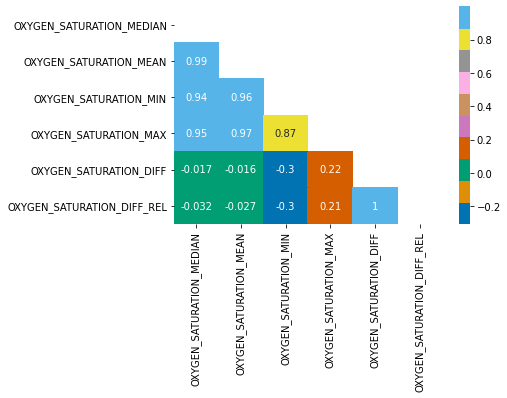

In [141]:
color_pal = sns.color_palette("colorblind", 10).as_hex()
sns.heatmap(bottom_matrix,  annot=True, cmap=list(color_pal));

Considerando uma correlação alta acima 0.9, existem as seguintes correlações elevadas neste conjunto de dados selecionados:
* OXYGEN_SATURATION_MEAN X OXYGEN_SATURATION_MEDIAN;
* OXYGEN_SATURATION_MIN x OXYGEN_SATURATION__MEDIAN;
* OXYGEN_SATURATION_MAX x OXYGEN_SATURATION_MEDIAN;
* OXYGEN_SATURATION_MIN x OXYGEN_SATURATION_MEAN;
* OXYGEN_SATURATION_MAX x OXYGEN_SATURATION_MEAN;
* OXYGEN_SATURATION_DIFF_REL x OXYGEN_SATURATION_DIFF.

Assim, das 06 features deste dataframe de exemplo, poderiam ser apagadas 03 features.

In [142]:
cut_value = 0.90
to_delete = [column for column in bottom_matrix.columns if any(bottom_matrix[column] > cut_value)]
print(f"{len(to_delete)} rows should be deleted.")
print(f"The following features should be deleted:{to_delete}")

3 rows should be deleted.
The following features should be deleted:['OXYGEN_SATURATION_MEDIAN', 'OXYGEN_SATURATION_MEAN', 'OXYGEN_SATURATION_DIFF']


Isso será feito para todas features contínuas numéricas, ou seja, dos resultados dos exames de sangue e suas expansões de uma vez. E para isso será feita uma função. Não será exibido o gráfico de Correlação de todas devido a quantidade de features envolvidas. 

In [143]:
# deleting features with correlation above defined cut value
def remove_high_corr_var(data, cut_value):
    '''
    Delete features with correlation above defined cut value

            Parameter:
                    data (dataframe): dataframe pandas to be modify
                    cut_value: value defines to cut features with upper Pearson's correlation coefficient 

            Returns:
                    new_data (dataframe): dataframe modified
    '''
    # creating a new dataframe without ICU feature to analyze the correlation between features
    data_without_ICU = data.drop("ICU", axis=1)

    # creating the correlation matrix with absolute coefficients
    matrix_corr = data_without_ICU.corr().abs()

    # mask to take only bottom values in matrix
    mask = np.triu(np.ones(matrix_corr.shape), k=0).astype(np.bool)

    # creating the bottom matrix
    bottom_matrix = matrix_corr.where(~mask)
    
    # columns to delete
    columns_to_delete = [column for column in bottom_matrix.columns if any(bottom_matrix[column] > cut_value)]
    
    # deleting the features
    data.drop(columns_to_delete, axis=1, inplace=True)

    return data

In [144]:
# calling the function
cleaned_data = remove_high_corr_var(cleaned_data, 0.9)
cleaned_data.sample(10)

,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MAX,BLAST_DIFF,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MAX,CREATININ_DIFF,FFA_MAX,FFA_DIFF,GGT_MAX,GGT_DIFF,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_DIFF,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MAX,INR_DIFF,LACTATE_MAX,...,SAT02_VENOUS_DIFF,SODIUM_MAX,SODIUM_DIFF,TGO_MAX,TGO_DIFF,TGP_MAX,TGP_DIFF,TTPA_MAX,TTPA_DIFF,UREA_MAX,UREA_DIFF,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,-1.0,-1.000000,-1.0,-0.895288,-1.0,-0.317073,-1.0,-0.268293,-1.0,-0.953951,-1.0,-1.0,-1.0,0.061224,-1.0,-0.842887,-1.0,-0.742004,-1.0,-0.967290,-1.0,-0.851024,-1.0,-1.0,-0.207317,-1.0,-0.932246,-1.0,-0.863097,...,-1.0,-0.542857,-1.0,-0.996268,-1.0,-0.994665,-1.0,-0.891008,-1.0,-0.725301,-1.0,-0.992214,-1.0,-0.030928,-0.285714,0.274725,0.919192,-0.470085,-0.686486,-0.716418,-0.454545,-0.333333,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,0,0,0,0,1,0,0,0,0
343,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.605263,-1.0,-1.000000,-1.0,-0.204188,-1.0,-0.317073,-1.0,-0.121951,-1.0,-0.938950,-1.0,-1.0,-1.0,0.122449,-1.0,-0.934890,-1.0,-0.846482,-1.0,-0.968458,-1.0,-0.891993,-1.0,-1.0,-0.341463,-1.0,-0.932246,-1.0,-0.897773,...,-1.0,-0.257143,-1.0,-0.991229,-1.0,-0.968369,-1.0,-0.880109,-1.0,-0.773494,-1.0,-0.892534,-1.0,0.278351,-0.428571,0.362637,0.959596,-0.213675,-0.513514,-0.462687,-0.575758,-0.217391,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,0,0,0,0,0,0,1,0,0
271,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605263,-1.0,-1.000000,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.902335,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.891993,-1.0,-1.0,-0.073171,-1.0,-0.959849,-1.0,1.000000,...,-1.0,-0.428571,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.918072,-1.0,-0.978029,-1.0,0.134021,-0.428571,0.538462,0.898990,-0.333333,-0.610811,-0.611940,-0.575758,0.014493,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0,1,0,0,0,0,0,0,0
152,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.315789,-1.0,-0.786096,-1.0,-0.916230,-1.0,-0.219512,-1.0,-0.268293,-1.0,-0.963370,-1.0,-1.0,-1.0,0.142857,-1.0,-0.898089,-1.0,-0.837953,-1.0,-0.845794,-1.0,-0.716946,-1.0,-1.0,-0.036585,-1.0,-0.957340,-1.0,-0.932476,...,-1.0,-0.314286,-1.0,-0.991975,-1.0,-0.987043,-1.0,-0.841962,-1.0,-0.908434,-1.0,-0.963921,-1.0,0.030928,-0.357143,0.582418,0.757576,-0.418803,-0.567568,-0.492537,-0.515152,0.072464,0.368421,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,0,0,0,0,1,0,0,0,0
46,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-1.0,-0.455497,-1.0,-0.317073,-1.0,-0.073171,-1.0,-0.991627,-1.0,-1.0,-1.0,0.346939,-1.0,-0.936306,-1.0,-0.850746,-1.0,-0.767523,-1.0,-0.851024,-1.0,-1.0,-0.365854,-1.0,-0.969887,-1.0,1.000000,...,-1.0,0.200000,-1.0,-0.998134,-1.0,-0.974085,-1.0,-0.896458,-1.0,-0.812048,-1.0,-0.987742,-1.0,0.443299,-0.428571,0.472527,0.797980,-0.076923,-0.243243,-0.253731,-0.575758,-0.072464,0.473684,-1.000000,-1.000000,-1.000000,-1.000000

#####**Passo 13: Juntar toda a preparação inicial dos dados numa única função.**

In [145]:
# join all functions in only one that prepare all data
def prepare_data(data, cut_value):
    '''
    Prepare all data to ML algorithms

            Parameter:
                    data (dataframe): dataframe pandas to be modify
                    cut_value: value defines to cut features with upper Pearson's correlation coefficient 

            Returns:
                    new_data (dataframe): dataframe modified
    '''

    # step 1: deleting rows with patient in ICU at first window
    print("\nExecuting step 1 - deleting rows with patient in ICU at first window...")
    to_remove = data.query("WINDOW=='0-2' and ICU==1")["PATIENT_VISIT_IDENTIFIER"].values
    cleaned_data = data.query("PATIENT_VISIT_IDENTIFIER not in @to_remove")

    # step 2: copying ICU value to first window, if patient in ICU
    print("\nExecuting step 2 - copying ICU value to first window, if patient in ICU...")
    cleaned_data = ICU_to_first_window(cleaned_data)

    # step 3: deleting all lines that indicate the patient is in the ICU, except the first window
    print("\nExecuting step 3 - deleting all lines that indicate the patient is in the ICU, except the first window...")
    cleaned_data = cleaned_data.query("WINDOW == '0-2' or ICU == 0") 

    # step 4: filling the NaN values in the blood results and their expanded columns with 
    # values from later results
    print("\nExecuting step 4 - filling the NaN values in the blood results and their expanded columns with values from later results...")
    cleaned_data = fill_dataframe(cleaned_data)

    # step 5: deleting other patients' windows
    print("\nExecuting step 5 - deleting other patients' windows...")
    cleaned_data = cleaned_data.query("WINDOW == '0-2'")

    # step 6: filling the NaN values in blood results with the mean of blood 
    # results of the others patients separately in ICU or not
    print("\nExecuting step 6 - filling the NaN values in blood results with the mean of blood results of the others patients separately in ICU or not...")
    cleaned_data = fill_NaN_values_blood_results(cleaned_data)

    # step 7: deleting the rows with NaN values
    print("\nExecuting step 7 - deleting the rows with NaN values...")
    cleaned_data.dropna(how="any", axis=0, inplace=True)

    # step 8: deleting the WINDOW feature
    print("\nExecuting step 8 - deleting the WINDOW feature...")
    cleaned_data.drop(["WINDOW"], axis=1, inplace=True)

    # step 9: converting the PATIENT_VISIT_IDENTIFIER feature to index
    print("\nExecuting step 9 - converting the PATIENT_VISIT_IDENTIFIER feature to index...")
    cleaned_data.set_index("PATIENT_VISIT_IDENTIFIER", inplace=True)

    # step 10: transforming the categorical feature AGE_PERCENTIL from string type to numerical type
    print("\nExecuting step 10 - transforming the categorical feature AGE_PERCENTIL from string type to numerical type...")
    cleaned_data = pd.get_dummies(cleaned_data)

    # step 11: deleting the AGE_ABOVE65 feature
    print("\nExecuting step 11 - deleting the AGE_ABOVE65 feature...")
    cleaned_data.drop("AGE_ABOVE65", axis=1, inplace=True)

    # step 12: deleting features with correlation above defined cut value
    print("\nExecuting step 12 - deleting features with correlation above defined cut value...")
    cleaned_data = remove_high_corr_var(cleaned_data, cut_value)

    return cleaned_data

In [146]:
cleaned_data = prepare_data(data, 0.9)
cleaned_data


Executing step 1 - deleting rows with patient in ICU at first window...

Executing step 2 - copying ICU value to first window, if patient in ICU...

Executing step 3 - deleting all lines that indicate the patient is in the ICU, except the first window...

Executing step 4 - filling the NaN values in the blood results and their expanded columns with values from later results...

Executing step 5 - deleting other patients' windows...

Executing step 6 - filling the NaN values in blood results with the mean of blood results of the others patients separately in ICU or not...

Executing step 7 - deleting the rows with NaN values...

Executing step 8 - deleting the WINDOW feature...

Executing step 9 - converting the PATIENT_VISIT_IDENTIFIER feature to index...

Executing step 10 - transforming the categorical feature AGE_PERCENTIL from string type to numerical type...

Executing step 11 - deleting the AGE_ABOVE65 feature...

Executing step 12 - deleting features with correlation above defi

,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MAX,BLAST_DIFF,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MAX,CREATININ_DIFF,FFA_MAX,FFA_DIFF,GGT_MAX,GGT_DIFF,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_DIFF,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MAX,INR_DIFF,LACTATE_MAX,...,SAT02_VENOUS_DIFF,SODIUM_MAX,SODIUM_DIFF,TGO_MAX,TGO_DIFF,TGP_MAX,TGP_DIFF,TTPA_MAX,TTPA_DIFF,UREA_MAX,UREA_DIFF,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.972789,-1.0,-1.0,-1.0,0.326531,-1.0,-0.968861,-1.0,-0.194030,-1.0,-0.316589,-1.0,-0.891993,-1.0,-1.0,-0.219512,-1.0,-0.959849,-1.0,-0.828421,...,-1.0,0.200000,-1.0,-0.989549,-1.0,-0.956555,-1.0,-0.846633,-1.0,-0.937349,-1.0,-0.978029,-1.0,0.175258,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0,0,1,0,0,0,0,0,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.935113,-1.0,-1.0,-1.0,0.357143,-1.0,-0.913659,-1.0,-0.829424,-1.0,-0.938084,-1.0,-0.851024,-1.0,-1.0,0.304878,-1.0,-0.959849,-1.0,1.000000,...,-1.0,0.142857,-1.0,-0.998507,-1.0,-0.991235,-1.0,-0.846633,-1.0,-0.903614,-1.0,-1.000000,-1.0,0.443299,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0,1,0,0,0,0,0,0,0,0,0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.891012,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.891993,-1.0,-1.0,0.243902,-1.0,-0.959849,-1.0,1.000000,...,-1.0,0.085714,-1.0,-0.997947,-1.0,-0.988948,-1.0,-0.846633,-1.0,-0.884337,-1.0,-1.000000,-1.0,0.030928,-0.428571,0.252747,0.919192,-0.247863,-0.567568,-0.626866,-0.575758,-0.333333,0.842105,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0,1,0,0,0,0,0,0,0,0,0
6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.944798,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.891993,-1.0,-1.0,-0.475610,-1.0,-0.959849,-1.0,1.000000,...,-1.0,-0.257143,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.951807,-1.0,-0.978029,-1.0,-0.010309,-0.500000,0.494505,0.959596,-0.452991,-0.610811,-0.537313,-0.636364,-0.043478,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0,0,0,0,0,1,0,0,0
7,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.966510,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.851024,-1.0,-1.0,-0.024390,-1.0,-0.967378,-1.0,1.000000,...,-1.0,-0.142857,-1.0,-0.995708,-1.0,-0.979040,-1.0,-0.934605,-1.0,-0.865060,-1.0,-0.974174,-1.0,0.319588,-0.285714,0.208791,0.939394,-0.179487,-0.491892,-0.671642,-0.454545,-0.420290,0.842105,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,1,0,0,0,0,0,

### **Análise dos Dados**
Tendo os dados já preparados para a análise propriamente dita, basicamente três itens serão analisados:
1. Se os dados estão balancedos quanto a quantidade de pacientes que foram para UTI e os que não foram;
2. Qual a distribuição em relação a quantidade de pacientes de cada faixa etária que foram  para UTI e os que não foram; e
3. Qual a quantidade de pacientes por cada grupo de doença que foram para UTI e que não foram.

Essas análises podem fornecer informações se essas features são mais ou menos relevantes para a predição se os pacientes irão ou não para UTI.

####**1. Dados balanceados?**

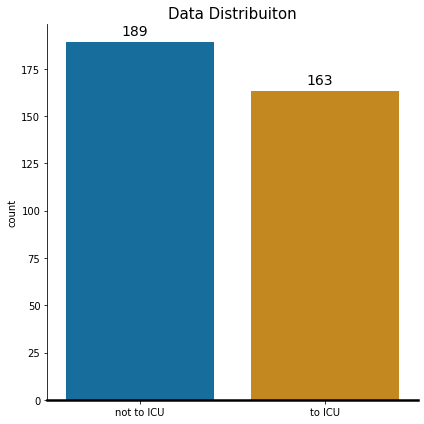

In [147]:
# affordable color palette for dautonics
color_pal = sns.color_palette("colorblind", 10).as_hex()
# definition of the figure
fig, ax = plt.subplots(figsize=(6, 6))

# configuring the graph
sns.countplot(x="ICU", palette=color_pal, data=cleaned_data, ax=ax )
# title
ax.set_title("Data Distribuiton", fontdict={'fontsize': 15})
# label x axis
ax.set_xlabel("")
# width of x axis
ax.spines['bottom'].set_linewidth(2.5)
# don't show lines top and right
for axis in ['top', 'right']:
   ax.spines[axis].set_color(None)

# labels above bars with quantities
high = []
high.append(len(cleaned_data.query("ICU == 0")))
high.append(len(cleaned_data.query("ICU == 1")))
position = [0, 1]
for i in range(2):
    ax.text(x=position[i]-0.1, y=high[i]+4, s=str(high[i]), fontsize=14)
# shows labels on x axis
plt.xticks([0, 1], ["not to ICU", "to ICU"])

plt.tight_layout();

In [148]:
print(f"The diference between patients who didn't go to the ICU and those who went to the ICU is  \
{((len(cleaned_data.query('ICU == 0'))-len(cleaned_data.query('ICU == 1')))/len(cleaned_data.query('ICU == 0')))*100:.1f}%.")




The diference between patients who didn't go to the ICU and those who went to the ICU is  13.8%.


Com ajudo do gráfico, é possível observar que a diferença entre os pacientes que foram para UTI e que não foram para UTI é pequena. Durante os testes dos modelos de aprendizado de máquina será utilizada a validação cruzada que minimiza a influência dessa diferença na performance do modelo. Mais a frente falamos um pouco sobre a validação cruzada.

####**2. Distribuição por faixa etária**

As quantidades de pacientes, por faixa etária, que foram para a UTI ou não, serão exibidos num gráfico.

In [149]:
# function to be applied to data prepared to create dataframe with AGE_PERCENTIL categorical feature of type string.
# This process is similar to undoing step 10 of preparing data on a new dataframe because to create the desired graph
def get_age_range(row):
    '''
    For each feature of the line, if the value is equal to 1 it returns the name of the age range in the column name.

            Parameter:
                    row: row of dataframe

            Returns:
                    Name of the age range: if the value is 1
                    None: if the value is 0. 
    '''
    # to each column name it'll set the row value in the new dataframe if its value is equal to 1
    for age_range in selected_data.iloc[:,1:].columns:
        if row[age_range] == 1:
            return age_range[14:]

# selecting the desired columns
selected_columns = cleaned_data.iloc[:, -11:].columns
# creating a new dataframe from desired columns
selected_data = cleaned_data[selected_columns]   

# creating dataframe with AGE_PERCENTIL
age_range_data = selected_data.apply(get_age_range, axis=1)

In [150]:
# concatenating ICU feature in the new dataframe
chart_data = pd.concat([age_range_data, selected_data["ICU"]], ignore_index=True, axis=1)
chart_data.columns = ["AGE_PERCENTIL", "ICU"]
chart_data.sort_values(by="AGE_PERCENTIL", inplace=True)
chart_data

,AGE_PERCENTIL,ICU
PATIENT_VISIT_IDENTIFIER,,
231,10th,1
197,10th,0
110,10th,0
51,10th,0
283,10th,0
...,...,...
145,Above 90th,1
82,Above 90th,1
353,Above 90th,0


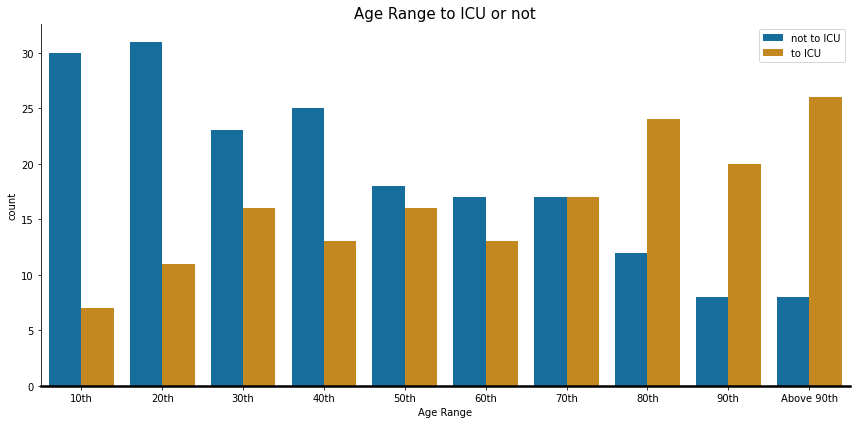

In [151]:
# creating and showing the chart
color_pal = sns.color_palette("colorblind", 10).as_hex()

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='AGE_PERCENTIL', palette=color_pal, data=chart_data, hue="ICU", ax=ax )
ax.set_title("Age Range to ICU or not", fontdict={'fontsize': 15})
ax.set_xlabel("Age Range")
ax.spines['bottom'].set_linewidth(2.5)
for axis in ['top', 'right']:
   ax.spines[axis].set_color(None)

ax.legend(labels=["not to ICU", "to ICU"])

plt.tight_layout();

A faixa etária que tem mais paciente indo para a UTI iguala nos 70 e aumenta nas faixas superiores aos 70. Ou seja, a faixa etária tem influência na ida ou não do paciente para a UTI.

####**3. Distribuição por grupo de doenças**

Similar às faixas etárias, será gerado um gráfico para ver os grupos de doenças com pacientes que foram a UTI ou não. Diferente do anterior, será produzido um gráfico para cada feature de grupo de doenças, que são: 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED' e 'OTHER'.

In [152]:
# selecting the group of diseases features 
disease_grouping = cleaned_data.iloc[:, 1:10].columns.to_list()
disease_grouping

['DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER']

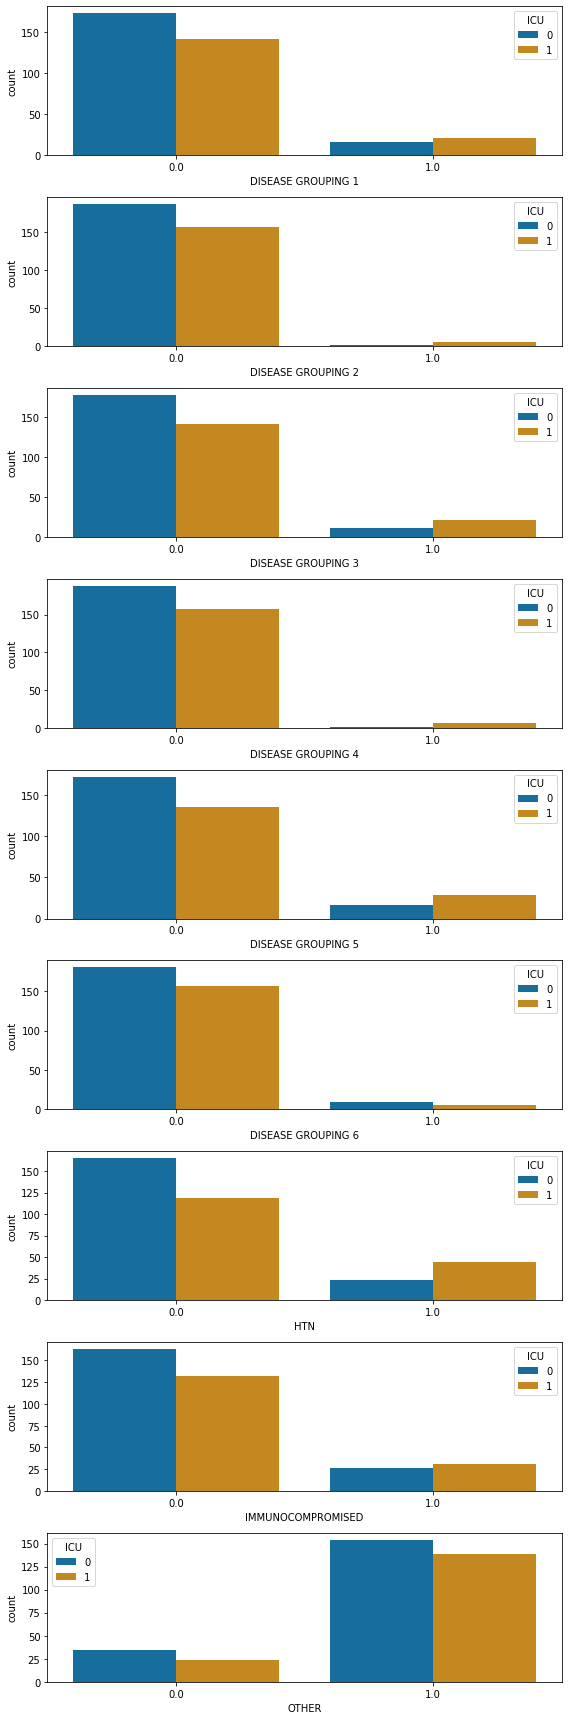

In [153]:
# creating and showing the 09 graphs
color_pal = sns.color_palette("colorblind", 4).as_hex()

fig, ax = plt.subplots(nrows=9, figsize=(8 , 24))

sns.countplot(x='DISEASE GROUPING 1', palette=color_pal, data=cleaned_data, hue="ICU", ax=ax[0])
sns.countplot(x='DISEASE GROUPING 2', palette=color_pal, data=cleaned_data, hue="ICU", ax=ax[1])
sns.countplot(x='DISEASE GROUPING 3', palette=color_pal, data=cleaned_data, hue="ICU", ax=ax[2])
sns.countplot(x='DISEASE GROUPING 4', palette=color_pal, data=cleaned_data, hue="ICU", ax=ax[3])
sns.countplot(x='DISEASE GROUPING 5', palette=color_pal, data=cleaned_data, hue="ICU", ax=ax[4])
sns.countplot(x='DISEASE GROUPING 6', palette=color_pal, data=cleaned_data, hue="ICU", ax=ax[5])
sns.countplot(x='HTN', palette=color_pal, data=cleaned_data, hue="ICU", ax=ax[6])
sns.countplot(x='IMMUNOCOMPROMISED', palette=color_pal, data=cleaned_data, hue="ICU", ax=ax[7])
sns.countplot(x='OTHER', palette=color_pal, data=cleaned_data, hue="ICU", ax=ax[8])

plt.tight_layout();

Entre os grupos de doenças, somente os pacientes que tiveram o grupo de outras doenças (OTHER) tem uma quantidade maior de pacientes que foram para UTI do que os que não as tiveram. Infelizmente estas doenças do grupo não são especificadas devido a anonimização dos pacientes.

##**Os Modelos de Aprendizado de Máquina**
Após a preparação dos dados e a análise exploratória propriamente dita, neste tópico serão abordadas os modelos de aprendizado de máquina a serem avaliados, as métricas de avaliação dos modelos, os treinamentos para a predição, os testes e, finalmente, a definição do modelo de melhor desempenho, conforme a métrica utilizada. 

O site do Scikit Learn possui um [gráfico com um fluxograma para a escolha do modelo](https://scikit-learn.org/stable/tutorial/machine_learning_map/) de acordo com a quantidade de dados, o tipo de modelo buscado e tipo da feature alvo. 

O desafio imposto pelo Hospital Sírio Libanês corresponde a uma classificação binária, isto é, se deseja saber se o paciente vai para UTI (feature ICU igual a 1) ou não (feature ICU igual a 0) e que será usado um modelo de aprendizado supervisionado, ou seja, o modelo irá aprender com os dados passados para prever os dados futuros. 

Alguns mais comuns modelos serão avaliados dentre os vários existentes, orientado pela documentação do Scikit Learn e artigos relacionados. São eles:
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html#tree);
* [SVC](https://scikit-learn.org/stable/modules/svm.html#svm-classification);
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/ensemble.html#forest);
* [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting);
*[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

Cada um desses modelos possuem vários parâmetros, chamados hiperparâmetros, que serão avaliados com o auxílio do [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), onde podem ser definidos os parâmetros a serem analisados dentro de uma faixa de valores e de acordo com o número de iterações definido.

Os dados serão divididos entre as features utilizadas na predição e a feature que se deseja predizer (feature ICU). Esses dados serão divididos em dados de treino e de teste, utilizando os recursos do Scikit Learn. A literatura varia muito quanto à proporção entre dados de treino e de teste, sendo o valor padrão (75% para treino e 25% para teste) do Scikit Learn a divisão utilizada. No momento da divisão, a estratificação dos dados também será observada, ou seja, os valores de treino e de teste mantêm a mesma proporção de categorias alvo (ICU) que o conjundo de dados. 

O recurso de [Validação Cruzada](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada) será utilizado. Este consiste na divisão do conjunto de dados em subconjuntos, sendo um dos subconjuntos utilizado para teste e o restante para treino, sendo que cada subconjunto é testado como dados de teste e o restante de treino.  Desta forma diminuimos a aleatoriedadde dos dados (geram avaliações diferentes do modelo), o overfiting (geram modelos excelentes para os dados de treino, mas ruins para dados de testes ou novos), o desbalanceamento dos dados e diminuimos o problema de nosso conjunto de dados ser relativamente pequeno após a preparação dos mesmos. 

Para uma melhor avaliação do modelo, os dados serão embaralhados antes de executar a validação cruzada.

A avaliação dos modelos é fundamental para definição do melhor modelo de predição. Algumas ferramentas utilizadas como métricas dos modelos são:
* acurácia - mostra, dentre todas as classificações, quantas o modelo classificou corretamente. É bom para obter uma visão geral de como o modelo performou;
* matriz de confusão - fornece informações relevantes para avaliar os modelos. Indica quantos valores, dos dados de teste, existem dentro dos seguintes grupos:
>1. verdadeiros positivos, ou seja, o modelo prevê que o paciente vai para UTI e ele realmente foi para a UTI;
>2. falsos positivos, que é quando o modelo prevê que o paciente foi para a UTI e ele não foi para a UTI;
>3. verdadeiros negativos, que ocorre quando o modelo prevê que ele não foi para a UTI e ele realmente não foi para a UTI; e
>4. falsos negativos, onde o modelo prevê que o paciente não foi para a UTI e ele foi para a UTI. Este último, no caso do problema a ser tratado pelo desafio do Kaggle, é o mais grave e deve ser levado em conta sempre o valor mais baixo;

*  relatório de classificação - fornece as seguintes informações:
>1. Precisão - dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas. É importante quando os Falsos Positivos é mais importante que os Falsos Negativos, o que não é o caso apresentado pelo desafio do kaggle, onde o Falso Negativo, isto é, dizer que o paciente não vai para a UTI e ele ir é mais importante, ou seja, deve ser o menor possível;
>2. Recall/Revocação/Sensibilidade - dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas. Indica que os Falsos Negativos são mais importantes que os Falsos Positivos, que é o caso deste projeto. Quanto maior a sensibilidade, melhor é o modelo;
>3. F1 Score - uma maneira de observar somente uma métrica ao invés de duas (precisão e sensibilidade) em alguma situação. É uma média harmônica entre as duas anteriores.

* AUC e curva ROC -  AUC (Area Under The Curve) e curva ROC (Receiver Operating Characteristics). É um das mais importantes métricas de avaliação de desempenho de modelos de classificação. Mostra o desempenho de um modelo de aprendizado de máquina por meio da relação da Taxa de Verdadeiro Positivo (Sensibilidade) e da Taxa de Falso Positivo (Especificidade), variando o ponto de corte na probabilidade estimada.


Após o teste do modelo, é necessário observar a importância de cada feature no modelo e eliminar as menos importantes a fim de ver se o modelo performa melhor.

Será criada uma função para todos as etapas acima. Os seguintes passos serão executados:
1. Cria o modelo;
2. Define os parâmetros e suas faixas de valores a serem testados;
3. Executa a função testando o modelo, avaliando-o e exibindo as features mais importantes; 
3. Apaga as features menos importantes;
4. Executa a função novamente com os dados com as features mais importantes e avalia o desempenho.

No final o modelo de melhor avaliação é escolhido.


### **Função para análise e teste dos modelos**

In [154]:
# libraries needed for data split, and analysis and testing of machine learning models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
import time


def run_model_RandomizedSearchCV(model, data, n_splits, n_repeats, 
                                 param_distributions, n_iter):
    '''
    Analyzes and tests machine learning models showing the metrics and graphs

            Parameter:
                    model: machine learning model to be analyzed and tested
                    data (dataframe): dataframe pandas to be used
                    n_splits: number of data divisions
                    n_repeats: number of cross validation repetitions
                    param_distributions: range of parameters and its values to be tested
                    n_iter: number of different combinations of parameters to be tested 

            Returns:
                    info: list with accuracy, auc mean, lower auc mean, 
                        upper auc mean, precision, recall, f1_score, 
                        number of features, model with the best parameters
                    importances.head(15): if the model provides, it is returned 
                        the fifteen most importants features
    '''
    # saves the start time of the function execution 
    start = time.time()
    # allows repeat the tests with the same randomic numbers created
    np.random.seed(1231234)
    # scrambles the data rows
    data = data.sample(frac=1)
    # splits the data in  target column and the other columns
    X_columns = data.columns
    y = data["ICU"]
    X = data[X_columns].drop("ICU", axis=1)
    # split the data in test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    # defines number of blocks in cross validation and number of repetitions
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    # search the best combination of the parameters executing the cross validation
    search = RandomizedSearchCV(model, param_distributions=param_distributions, 
                                n_iter=n_iter, cv=cv, scoring="roc_auc", 
                                return_train_score=True)
    # fits to train
    search.fit(X_train, y_train)
    # creates the dataframe with d=the results of search
    results = pd.DataFrame(search.cv_results_)
    # obtain auc mean from test
    auc_mean = results.iloc[search.best_index_]['mean_test_score']
    # obtain auc mean from train
    auc_mean_train = results.iloc[search.best_index_]["mean_train_score"]
    # obtain standard deviation from auc
    auc_std = results.iloc[search.best_index_]["std_test_score"]
    # saves the model with the best parameters
    cv_model = search.best_estimator_
    # predict target feature using the best model
    y_pred = cv_model.predict(X_test)
    # saves the confusion matrix, precision, recall, f1_score and accuracy
    best_confusion_matrix = confusion_matrix(y_test, y_pred)
    report = precision_recall_fscore_support(y_test, y_pred, average="binary")
    precision = report[0]
    recall = report[1]
    f1_score = report[2]
    accuracy = accuracy_score(y_test, y_pred)
    # shows metric and graphs
    print(f"\nAccuracy {accuracy}")
    print("\nClassification Report")
    print(classification_report(y_test, y_pred))
    print(f'AUC TEST  {auc_mean} - AUC TRAIN {auc_mean_train}')
    # calculates the range where take place the 95% the auc_mean values 
    lower_auc_mean = auc_mean - 2*auc_std
    upper_auc_mean = auc_mean + 2*auc_std
    print(f"Interval AUC TEST {lower_auc_mean} - {upper_auc_mean}\n\n")
    info = [accuracy, auc_mean, lower_auc_mean, upper_auc_mean, precision, 
            recall, f1_score, X.shape[1], cv_model, n_splits, n_iter]
    # info = [accuracy, auc_mean, lower_auc_mean, upper_auc_mean, precision, 
    #         recall, f1_score, X.shape[1], cv_model]
    try:
        #if the model provides the features importances, they are saved
        importances = pd.Series(data=cv_model.feature_importances_, index=X.columns)
        importances = importances.sort_values(ascending=False)
        # shows feature importances graph
        fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
        sns.heatmap(np.around(best_confusion_matrix), annot=True, ax=ax[0]).set_title("Confusion Matrix")
        sns.barplot(x=importances[importances>0], y=importances[importances>0].index, orient='h', ax=ax[1]).set_title("Features Importances > 0")
        plt.tight_layout();
        # saves finish time of function
        finish = time.time()
        # append duration in info list
        info.append((str(finish-start)+"s"))
        return info, importances.head(15)
    except AttributeError:
        sns.heatmap(np.around(best_confusion_matrix), annot=True).set_title("Confusion Matrix")
        print("Model don't have attribute features importances.")
        plt.tight_layout();
        finish = time.time()
        info.append((str(finish-start)+"s"))
        return info
    
    

### **Análise dos Modelos**

In [155]:
# create the list of rating
rating = []

####**DecisionTreeClassifier**


Accuracy 0.6931818181818182

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        47
           1       0.68      0.66      0.67        41

    accuracy                           0.69        88
   macro avg       0.69      0.69      0.69        88
weighted avg       0.69      0.69      0.69        88

AUC TEST  0.7078362684729064 - AUC TRAIN 0.7969286592476605
Interval AUC TEST 0.5553863150170779 - 0.8602862219287348




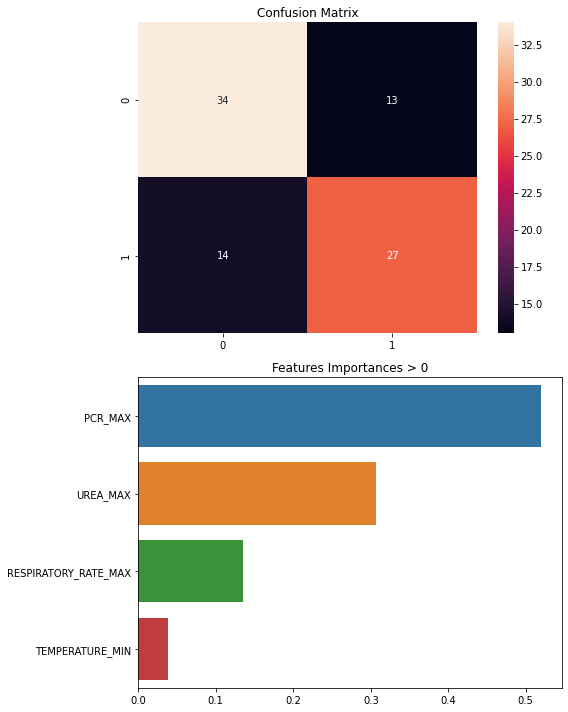

In [156]:
# Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier
# module to create randomic integers
from scipy.stats import randint

# instantiate the model
model_tree = DecisionTreeClassifier()
# distribuition of parameter values
param_model_tree = {
    "max_depth" : randint(3, 6),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "criterion" : ["gini", "entropy"]
}

# run the model
info_model, importances = run_model_RandomizedSearchCV(model_tree, cleaned_data, 5, 10, param_model_tree, 50)

In [157]:
info_model.append("DecisionTreeClassifier")
rating.append(info_model)
info_model

[0.6931818181818182,
 0.7078362684729064,
 0.5553863150170779,
 0.8602862219287348,
 0.675,
 0.6585365853658537,
 0.6666666666666667,
 105,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=5, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=32, min_samples_split=103,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 5,
 50,
 '18.262508630752563s',
 'DecisionTreeClassifier']

In [158]:
importances

PCR_MAX                     0.520270
UREA_MAX                    0.307212
RESPIRATORY_RATE_MAX        0.134815
TEMPERATURE_MIN             0.037702
HEMOGLOBIN_MAX              0.000000
CREATININ_MAX               0.000000
CREATININ_DIFF              0.000000
FFA_MAX                     0.000000
FFA_DIFF                    0.000000
GGT_MAX                     0.000000
GGT_DIFF                    0.000000
GLUCOSE_MAX                 0.000000
GLUCOSE_DIFF                0.000000
HEMATOCRITE_DIFF            0.000000
AGE_PERCENTIL_Above 90th    0.000000
dtype: float64

####**SVC**


Accuracy 0.7159090909090909

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.87      0.77        47
           1       0.79      0.54      0.64        41

    accuracy                           0.72        88
   macro avg       0.73      0.70      0.70        88
weighted avg       0.73      0.72      0.71        88

AUC TEST  0.7494291050903118 - AUC TRAIN 0.8087102841559174
Interval AUC TEST 0.62980779830947 - 0.8690504118711536


Model don't have attribute features importances.


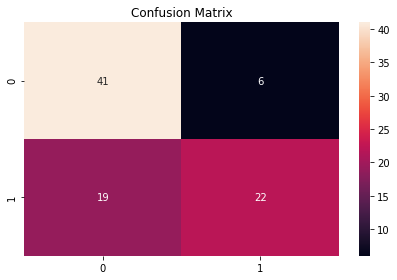

In [159]:
# SVC module
from sklearn.svm import SVC

# instantiate the model
model_svc = SVC()
# distribuition of parameter values
param_model_svc = {
    # "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"],
    "degree": randint(2, 4),
    "shrinking": [True, False],
    # "probability": [True, False],
    # "decision_function_shape": ["ovo", "ovr"]
    # "max_iter": randint(2, 3)
}
# run the model
info_model = run_model_RandomizedSearchCV(model_svc, cleaned_data, 5, 10, param_model_svc, 50)

In [160]:
info_model.append("SVC")
rating.append(info_model)
info_model

[0.7159090909090909,
 0.7494291050903118,
 0.62980779830947,
 0.8690504118711536,
 0.7857142857142857,
 0.5365853658536586,
 0.6376811594202899,
 105,
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 5,
 50,
 '61.59957504272461s',
 'SVC']

####**RandomForestClassifier**


Accuracy 0.75

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        47
           1       0.83      0.59      0.69        41

    accuracy                           0.75        88
   macro avg       0.77      0.74      0.74        88
weighted avg       0.77      0.75      0.74        88

AUC TEST  0.8373933087027915 - AUC TRAIN 0.9011039089767638
Interval AUC TEST 0.7394310555188113 - 0.9353555618867717




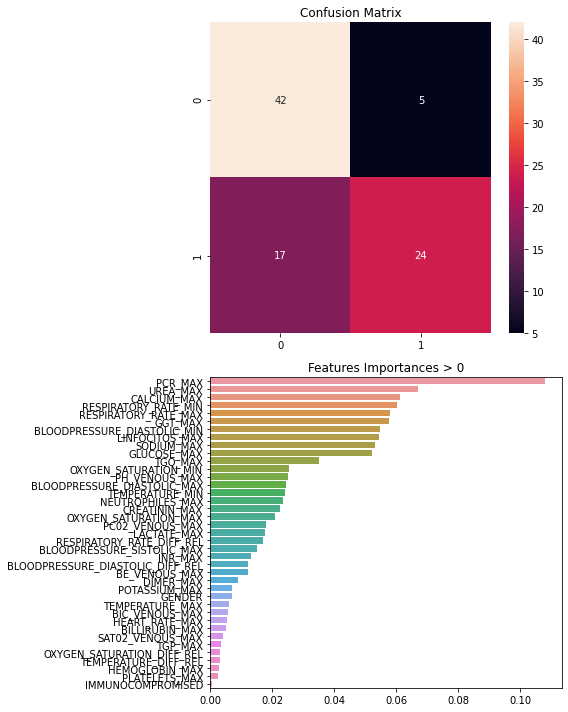

In [161]:
# RandomForestClassifier module
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
model_randomforest = RandomForestClassifier()
# distribuition of parameter values
param_model_randomforest = {
    "n_estimators": randint(50, 150),
    "criterion": ["gini", "entropy"],
    "max_depth": randint(3, 10),
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False],
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129)
}

# run the model
info_model, importances = run_model_RandomizedSearchCV(model_randomforest, cleaned_data, 5, 10, param_model_randomforest, 50)

In [162]:
info_model.append("RandomForestClassifier")
rating.append(info_model)
info_model

[0.75,
 0.8373933087027915,
 0.7394310555188113,
 0.9353555618867717,
 0.8275862068965517,
 0.5853658536585366,
 0.6857142857142856,
 105,
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=7, max_features='log2',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=42, min_samples_split=90,
                        min_weight_fraction_leaf=0.0, n_estimators=79,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 5,
 50,
 '319.4606113433838s',
 'RandomForestClassifier']

In [163]:
importances

PCR_MAX                        0.108019
UREA_MAX                       0.067145
CALCIUM_MAX                    0.061134
RESPIRATORY_RATE_MIN           0.060352
RESPIRATORY_RATE_MAX           0.058141
GGT_MAX                        0.057676
BLOODPRESSURE_DIASTOLIC_MIN    0.054696
LINFOCITOS_MAX                 0.054620
SODIUM_MAX                     0.053131
GLUCOSE_MAX                    0.052166
TGO_MAX                        0.035119
OXYGEN_SATURATION_MIN          0.025491
PH_VENOUS_MAX                  0.025060
BLOODPRESSURE_DIASTOLIC_MAX    0.024642
TEMPERATURE_MIN                0.024062
dtype: float64


Accuracy 0.75

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        47
           1       0.81      0.61      0.69        41

    accuracy                           0.75        88
   macro avg       0.76      0.74      0.74        88
weighted avg       0.76      0.75      0.74        88

AUC TEST  0.8194596469622332 - AUC TRAIN 0.8649632221429668
Interval AUC TEST 0.7235713664832927 - 0.9153479274411737




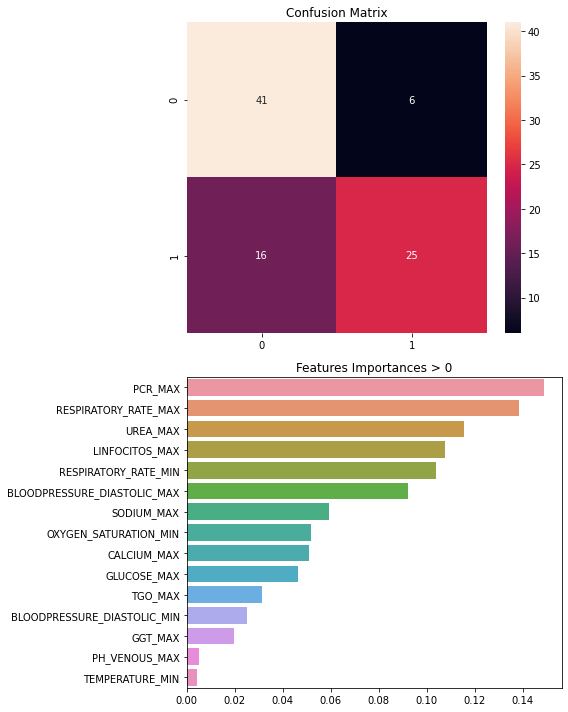

In [164]:
# select only the 15 most important features
columns_selected = list(importances.index)
columns_selected.append("ICU")
cleaned_data_new = cleaned_data[columns_selected]

# run the model
info_model, importances = run_model_RandomizedSearchCV(model_randomforest, cleaned_data_new, 5, 10, param_model_randomforest, 50)

In [165]:
info_model.append("RandomForestClassifier")
rating.append(info_model)
info_model

[0.75,
 0.8194596469622332,
 0.7235713664832927,
 0.9153479274411737,
 0.8064516129032258,
 0.6097560975609756,
 0.6944444444444445,
 15,
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=8, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=39, min_samples_split=110,
                        min_weight_fraction_leaf=0.0, n_estimators=125,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 5,
 50,
 '312.5650951862335s',
 'RandomForestClassifier']

In [166]:
importances

PCR_MAX                        0.148680
RESPIRATORY_RATE_MAX           0.138256
UREA_MAX                       0.115619
LINFOCITOS_MAX                 0.107433
RESPIRATORY_RATE_MIN           0.103822
BLOODPRESSURE_DIASTOLIC_MAX    0.092270
SODIUM_MAX                     0.059212
OXYGEN_SATURATION_MIN          0.051786
CALCIUM_MAX                    0.050950
GLUCOSE_MAX                    0.046367
TGO_MAX                        0.031227
BLOODPRESSURE_DIASTOLIC_MIN    0.025225
GGT_MAX                        0.019563
PH_VENOUS_MAX                  0.005158
TEMPERATURE_MIN                0.004434
dtype: float64

####**GradientBoostingClassifier**


Accuracy 0.7727272727272727

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        47
           1       0.84      0.63      0.72        41

    accuracy                           0.77        88
   macro avg       0.79      0.76      0.76        88
weighted avg       0.78      0.77      0.77        88

AUC TEST  0.8519227422003284 - AUC TRAIN 1.0
Interval AUC TEST 0.7648328267236149 - 0.9390126576770419




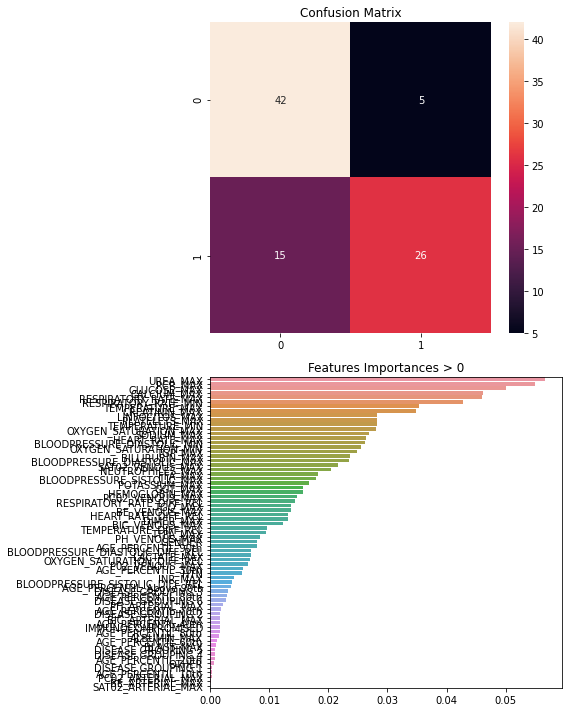

In [167]:
# GradientBoostingClassifier module
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
model_gradientboosting = GradientBoostingClassifier(verbose=0)
# distribuition of parameter values
param_model_gradientboosting = {
    "loss" : ["deviance", "exponential"],
    # "n_estimators":randint(100, 150),
    "criterion": ["friedman_mse", "mse", "mae"],
    "min_samples_split" : randint(2, 50),
    "min_samples_leaf" : randint(1, 50),
    "max_depth": randint(3, 10),
    "max_features": ["auto", "sqrt", "log2"]
}

# run the model
info_model, importances = run_model_RandomizedSearchCV(model_gradientboosting, cleaned_data, 5, 10, param_model_gradientboosting, 50)

In [168]:
info_model.append("GradientBoostingClassifier")
rating.append(info_model)
info_model

[0.7727272727272727,
 0.8519227422003284,
 0.7648328267236149,
 0.9390126576770419,
 0.8387096774193549,
 0.6341463414634146,
 0.7222222222222222,
 105,
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='exponential', max_depth=9,
                            max_features='log2', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=10,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 5,
 50,
 '557.1952822208405s',
 'GradientBoostingClassifier']

In [169]:
importances

UREA_MAX                       0.056616
PCR_MAX                        0.054996
GLUCOSE_MAX                    0.050047
CALCIUM_MAX                    0.046211
RESPIRATORY_RATE_MAX           0.046026
RESPIRATORY_RATE_MIN           0.042741
TEMPERATURE_MAX                0.035329
CREATININ_MAX                  0.034807
LINFOCITOS_MAX                 0.028283
PLATELETS_MAX                  0.028259
TEMPERATURE_MIN                0.028240
OXYGEN_SATURATION_MAX          0.028045
SODIUM_MAX                     0.026852
HEART_RATE_MAX                 0.026429
BLOODPRESSURE_DIASTOLIC_MIN    0.026193
dtype: float64


Accuracy 0.7727272727272727

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        47
           1       0.77      0.73      0.75        41

    accuracy                           0.77        88
   macro avg       0.77      0.77      0.77        88
weighted avg       0.77      0.77      0.77        88

AUC TEST  0.8365359605911331 - AUC TRAIN 0.9852750111035538
Interval AUC TEST 0.7581717472729359 - 0.9149001739093303




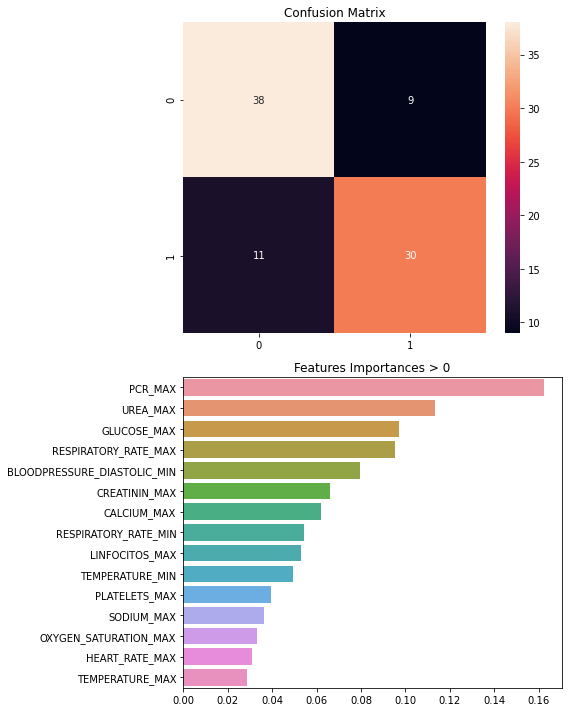

In [170]:
# select only the 15 most important features
columns_selected = list(importances.index)
columns_selected.append("ICU")
cleaned_data_new = cleaned_data[columns_selected]

# run the model
info_model, importances = run_model_RandomizedSearchCV(model_gradientboosting, cleaned_data_new, 5, 10, param_model_gradientboosting, 50)

In [171]:
info_model.append("GradientBoostingClassifier")
rating.append(info_model)
info_model

[0.7727272727272727,
 0.8365359605911331,
 0.7581717472729359,
 0.9149001739093303,
 0.7692307692307693,
 0.7317073170731707,
 0.7499999999999999,
 15,
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='exponential', max_depth=9,
                            max_features='log2', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=32, min_samples_split=43,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 5,
 50,
 '355.68829369544983s',
 'GradientBoostingClassifier']

In [172]:
importances

PCR_MAX                        0.162183
UREA_MAX                       0.113228
GLUCOSE_MAX                    0.096881
RESPIRATORY_RATE_MAX           0.095184
BLOODPRESSURE_DIASTOLIC_MIN    0.079488
CREATININ_MAX                  0.065817
CALCIUM_MAX                    0.062086
RESPIRATORY_RATE_MIN           0.054400
LINFOCITOS_MAX                 0.052752
TEMPERATURE_MIN                0.049450
PLATELETS_MAX                  0.039546
SODIUM_MAX                     0.036287
OXYGEN_SATURATION_MAX          0.033281
HEART_RATE_MAX                 0.030802
TEMPERATURE_MAX                0.028616
dtype: float64

####**KNeighborsClassifier**


Accuracy 0.6477272727272727

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.81      0.71        47
           1       0.68      0.46      0.55        41

    accuracy                           0.65        88
   macro avg       0.66      0.64      0.63        88
weighted avg       0.65      0.65      0.64        88

AUC TEST  0.7183854474548441 - AUC TRAIN 1.0
Interval AUC TEST 0.6273486943932938 - 0.8094222005163945


Model don't have attribute features importances.


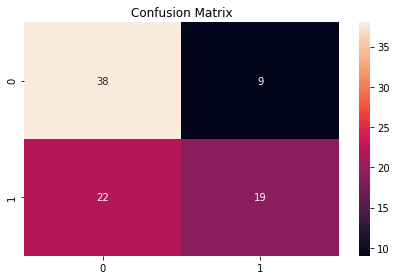

In [173]:
# KNeighborsClassifier module
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
model_kneighborsclassifier = KNeighborsClassifier()
# distribuition of parameter values
param_model_kneighborsclassifier = {
    "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
    "n_neighbors":randint(5, 10),
    "weights": ["uniform", "distance"]
}

# run the model
info_model = run_model_RandomizedSearchCV(model_kneighborsclassifier, cleaned_data, 5, 10, param_model_kneighborsclassifier, 50)

In [174]:
info_model.append("KNeighborsClassifier")
rating.append(info_model)
info_model

[0.6477272727272727,
 0.7183854474548441,
 0.6273486943932938,
 0.8094222005163945,
 0.6785714285714286,
 0.4634146341463415,
 0.5507246376811594,
 105,
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                      weights='distance'),
 5,
 50,
 '45.5533607006073s',
 'KNeighborsClassifier']

É necessário visualizar todas as informações relevantes das métricas calculadas para cada modelo testado.

In [175]:
# creating the dataframe with the ratings
df_rating = pd.DataFrame(rating, columns=["accuracy", "auc_mean", 
                                          "lower_auc_mean", "upper_auc_mean", 
                                          "precision", "recall", "f1_score", 
                                          "columns", "model", "n_splits", 
                                          "n_iter", "time", "name_model"])
df_rating = df_rating[["name_model", "auc_mean", "lower_auc_mean", 
                       "upper_auc_mean", "time", "recall", "f1_score", 
                       "precision", "accuracy", "columns", "n_splits", 
                       "n_iter", "model"]]
# viewing the data
df_rating.sort_values("auc_mean", ascending=False)

,name_model,auc_mean,lower_auc_mean,upper_auc_mean,time,recall,f1_score,precision,accuracy,columns,n_splits,n_iter,model
4,GradientBoostingClassifier,0.851923,0.764833,0.939013,557.1952822208405s,0.634146,0.722222,0.838710,0.772727,105,5,50,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
2,RandomForestClassifier,0.837393,0.739431,0.935356,319.4606113433838s,0.585366,0.685714,0.827586,0.750000,105,5,50,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
5,GradientBoostingClassifier,0.836536,0.758172,0.914900,355.68829369544983s,0.731707,0.750000,0.769231,0.772727,15,5,50,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
3,RandomForestClassifier,0.819460,0.723571,0.915348,312.5650951862335s,0.609756,0.694444,0.806452,0.750000,15,5,50,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
1,SVC,0.749429,0.629808,0.869050,61.59957504272461s,0.536585,0.637681,0.785714,0.715909,105,5,50,"SVC(C=1.0, break_ties=False, cache_size=200, c..."
6,KNeighborsClassifier,0.718385,0.627349,0.809422,45.5533607006073s,0.463415,0.550725,0.678571,0.647727,105,5,50,"KNeighborsClassifier(algorithm='ball_tree', le..."
0,DecisionTreeClassifier,0.707836,0.555386,0.860286,18.262508630752563s,0.658537,0.666667,0.675000,0.693182,105,5,50,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


Visualizando o modelo com melhor métrica.

In [176]:
# viewing the model with the best parameters
df_rating.iloc[4]["model"]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=9,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### **Outra função para análisar e testar mais combinações de parâmetros e divisões de blocos**

No entanto, a fim de automatizar a análise dos mesmo modelos com uma variação maior de parâmetros nos testes, a função para testar os modelos foi simplificada para não exibir mensagens e nem gráficos, gerando somente os dados das métricas e dos modelos para serem comparados. Ela é chamada dentro de outra função que contém um loop para variar o número de iterações (quantidade limite de combinações de parâmetros diferentes num modelo) e de divisões da validação cruzada.

In [ ]:
def run_model_RandomizedSearchCV_simplifyed(model, data, n_splits, n_repeats, 
                                 param_distributions, n_iter):
    '''
    Analyzes and tests machine learning models showing the metrics and graphs

            Parameter:
                    model: machine learning model to be analyzed and tested
                    data (dataframe): dataframe pandas to be used
                    n_splits: number of data divisions
                    n_repeats: number of cross validation repetitions
                    param_distributions: range of parameters and its values to be tested
                    n_iter: number of different combinations of parameters to be tested 

            Returns:
                    info: list with accuracy, auc mean, lower auc mean, 
                        upper auc mean, precision, recall, f1_score, 
                        number of features, model with the best parameters
                    importances.head(15): if the model provides, it is returned 
                        the fifteen most importants features
    '''
    start = time.time()
    np.random.seed(1231234)
    data = data.sample(frac=1)
    X_columns = data.columns
    y = data["ICU"]
    X = data[X_columns].drop("ICU", axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    search = RandomizedSearchCV(model, param_distributions=param_distributions, 
                                n_iter=n_iter, cv=cv, scoring="roc_auc", 
                                return_train_score=True)
    search.fit(X_train, y_train)
    results = pd.DataFrame(search.cv_results_)
    auc_mean = results.iloc[search.best_index_]['mean_test_score']
    auc_mean_train = results.iloc[search.best_index_]["mean_train_score"]
    auc_std = results.iloc[search.best_index_]["std_test_score"]
    
    cv_model = search.best_estimator_
    y_pred = cv_model.predict(X_test)
    best_confusion_matrix = confusion_matrix(y_test, y_pred)
    report = precision_recall_fscore_support(y_test, y_pred, average="binary")
    precision = report[0]
    recall = report[1]
    f1_score = report[2]
    accuracy = accuracy_score(y_test, y_pred)

    lower_auc_mean = auc_mean - 2*auc_std
    upper_auc_mean = auc_mean + 2*auc_std
    
    info = [accuracy, auc_mean, lower_auc_mean, upper_auc_mean, precision, 
            recall, f1_score, X.shape[1], cv_model, n_splits, n_iter]
    try:
        importances = pd.Series(data=cv_model.feature_importances_, index=X.columns)
        importances = importances.sort_values(ascending=False)
        finish = time.time()
        info.append((str(finish-start)+"s"))
        return info, importances.head(15)
    except AttributeError:
        finish = time.time()
        info.append((str(finish-start)+"s"))
        return info

In [ ]:
def testing_splits_repeats_steps(data, start_splits, finish_splits, start_iter,
                                 finish_iter, step):
    '''
    Analyzes and tests machine learning models showing the metrics and graphs

            Parameter:
                    data (dataframe): dataframe pandas to be used
                    start_splits: initial number of divisions in cross-validation
                    finish_splits: final number of divisions in cross-validation
                    start_iter: initial number of iterations
                    finish_iter: final number of iterations
                    step: step of varying the number of iterations

            Returns:
                    df_rating_full: dataframe with the evaluation data of all tested models
    '''
    # create the list of evaluations
    rating_full = []
    # loops that change n_splits and n_iter
    for n_splits in range(start_splits, (finish_splits + 1)):
        for n_iter in range(start_iter, (finish_iter + 1), step):
            info_model, importances = run_model_RandomizedSearchCV_simplifyed(model_tree, 
                                                                data, 
                                                                n_splits, 
                                                                10, param_model_tree, 
                                                                n_iter)
            info_model.append("DecisionTreeClassifier")
            rating_full.append(info_model)

            info_model = run_model_RandomizedSearchCV_simplifyed(model_svc, data, 
                                                    n_splits, 10, param_model_svc, 
                                                    n_iter)
            info_model.append("SVC")
            rating_full.append(info_model)

            info_model, importances = run_model_RandomizedSearchCV_simplifyed(model_randomforest, 
                                                                data, n_splits, 
                                                                10, param_model_randomforest, 
                                                                n_iter)
            info_model.append("RandomForestClassifier")
            rating_full.append(info_model)
            columns_selected = list(importances.index)
            columns_selected.append("ICU")
            data_new = data[columns_selected]
            info_model, importances = run_model_RandomizedSearchCV_simplifyed(model_randomforest, data_new, 
                                                                n_splits, 10, param_model_randomforest, 
                                                                n_iter)
            info_model.append("RandomForestClassifier")
            rating_full.append(info_model)

            info_model, importances = run_model_RandomizedSearchCV_simplifyed(model_gradientboosting, data, 
                                                                n_splits, 10, param_model_gradientboosting, 
                                                                n_iter)
            info_model.append("GradientBoostingClassifier")
            rating_full.append(info_model)
            columns_selected = list(importances.index)
            columns_selected.append("ICU")
            data_new = data[columns_selected]
            info_model, importances = run_model_RandomizedSearchCV_simplifyed(model_gradientboosting, data_new, 
                                                                n_splits, 10, param_model_gradientboosting, 
                                                                n_iter)
            info_model.append("GradientBoostingClassifier")
            rating_full.append(info_model)

            info_model = run_model_RandomizedSearchCV_simplifyed(model_kneighborsclassifier, data, n_splits, 
                                                    10, param_model_kneighborsclassifier, n_iter)
            info_model.append("KNeighborsClassifier")
            rating_full.append(info_model)

    df_rating_full = pd.DataFrame(rating_full, columns=["accuracy", "auc_mean", 
                                            "lower_auc_mean", "upper_auc_mean", 
                                            "precision", "recall", "f1_score", 
                                            "columns", "model", "n_splits", 
                                            "n_iter", "time", "name_model"])
    df_rating_full = df_rating_full[["name_model", "auc_mean", "lower_auc_mean", 
                        "upper_auc_mean", "time", "recall", "f1_score", 
                        "precision", "accuracy", "n_splits", "n_iter", "time", "columns", "model"]]
    df_rating_full = df_rating_full.sort_values("auc_mean", ascending=False)
    return df_rating_full

O bloco de comandos foi executado utilizando a função para testar valores de divisão de bolcos iguais a 4 e 5 e número de iterações, ou seja, número de combinações dos parâmetros dos modelos de aprendizado de máquina iguais a 10 a 60 iterações, com passo 10.  A sua execução demora consideravelmente, por isso ele está aqui como uma figura e não um bloco executável de comando. O resultado das métricas de cada melhor modelo foi salvo como um arquivo [rating.csv](https://github.com/gustavopierre/The_Patient_with_COVID19_Will_Go_to_UCI_or_Not/raw/main/data/rating.csv) no [github do projeto](https://github.com/gustavopierre/The_Patient_with_COVID19_Will_Go_to_UCI_or_Not).
<p align="center">
  <img src="https://github.com/gustavopierre/The_Patient_with_COVID19_Will_Go_to_UCI_or_Not/blob/main/img/part_of_code.png?raw=true" alt="code snippet" >
</p>

O arquivo com as avaliações será visualizado e o modelo com melhores parâmetros será exibido.

In [181]:
# create a dataframe reading rating.csv
df = pd.read_csv("https://github.com/gustavopierre/The_Patient_with_COVID19_Will_Go_to_UCI_or_Not/raw/main/data/rating.csv")
df

,Unnamed: 0,index,name_model,auc_mean,lower_auc_mean,upper_auc_mean,time,recall,f1_score,precision,accuracy,n_splits,n_iter,time.1,columns,model
0,0,33,GradientBoostingClassifier,0.859473,0.764008,0.954938,85.45409893989563s,0.634146,0.702703,0.787879,0.750000,5,10,85.45409893989563s,15,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
1,1,53,GradientBoostingClassifier,0.847564,0.764155,0.930973,469.7500832080841s,0.609756,0.684932,0.781250,0.738636,5,40,469.7500832080841s,105,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
2,2,25,GradientBoostingClassifier,0.847044,0.772433,0.921656,347.1570932865143s,0.658537,0.701299,0.750000,0.738636,4,40,347.1570932865143s,105,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
3,3,46,GradientBoostingClassifier,0.846876,0.750960,0.942791,399.918221950531s,0.682927,0.736842,0.800000,0.772727,5,30,399.918221950531s,105,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
4,4,40,GradientBoostingClassifier,0.843907,0.747639,0.940176,130.3335518836975s,0.634146,0.712329,0.812500,0.761364,5,20,130.3335518836975s,15,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
5,5,26,GradientBoostingClassifier,0.843694,0.764787,0.922602,209.1794056892395s,0.707317,0.753247,0.805556,0.784091,4,40,209.1794056892395s,15,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
6,6,18,GradientBoostingClassifier,0.842675,0.780476,0.904874,293.8954248428345s,0.707317,0.743590,0.783784,0.772727,4,30,293.8954248428345s,105,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
7,7,4,GradientBoostingClassifier,0.842189,0.752312,0.932066,130.03760600090027s,0.682927,0.717949,0.756757,0.750000,4,10,130.03760600090027s,105,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
8,8,32,GradientBoostingClassifier,0.841580,0.744515,0.938644,176.8223192691803s,0.682927,0.746667,0.823529,0.784091,5,10,176.8223192691803s,105,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
9,9,11,GradientBoostingClassifier,0.841253,0.747785,0.934720,168.1388864517212s,0.658537,0.720000,0.794118,0.761364,4,20,168.1388864517212s,105,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."


In [198]:
# verifying the best model
best_model = df.iloc[0]["model"]
best_model

"GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,\n                           learning_rate=0.1, loss='exponential', max_depth=5,\n                           max_features='sqrt', max_leaf_nodes=None,\n                           min_impurity_decrease=0.0, min_impurity_split=None,\n                           min_samples_leaf=24, min_samples_split=19,\n                           min_weight_fraction_leaf=0.0, n_estimators=100,\n                           n_iter_no_change=None, presort='deprecated',\n                           random_state=None, subsample=1.0, tol=0.0001,\n                           validation_fraction=0.1, verbose=0,\n                           warm_start=False)"

## **Escolha do Modelo**
Ao analisar os modelos, foram gerados dois dataframes com avaliações dos modelos testados. Os dois dataframes serão unidos para definir um ranking único de onde será definido  modelo de melhor métrica.

In [194]:
# selecting the columns
selected_columns = df_rating.columns
# concating the two dataframes
df_final = pd.concat([df_rating[selected_columns], df[selected_columns]])
df_final.sort_values("auc_mean", ascending=False, inplace=True)
df_final

,name_model,auc_mean,lower_auc_mean,upper_auc_mean,time,recall,f1_score,precision,accuracy,columns,n_splits,n_iter,model
0,GradientBoostingClassifier,0.859473,0.764008,0.954938,85.45409893989563s,0.634146,0.702703,0.787879,0.750000,15,5,10,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
4,GradientBoostingClassifier,0.851923,0.764833,0.939013,557.1952822208405s,0.634146,0.722222,0.838710,0.772727,105,5,50,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
1,GradientBoostingClassifier,0.847564,0.764155,0.930973,469.7500832080841s,0.609756,0.684932,0.781250,0.738636,105,5,40,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
2,GradientBoostingClassifier,0.847044,0.772433,0.921656,347.1570932865143s,0.658537,0.701299,0.750000,0.738636,105,4,40,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
3,GradientBoostingClassifier,0.846876,0.750960,0.942791,399.918221950531s,0.682927,0.736842,0.800000,0.772727,105,5,30,"GradientBoostingClassifier(ccp_alpha=0.0, crit..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,DecisionTreeClassifier,0.704405,0.560465,0.848345,4.919738054275513s,0.658537,0.666667,0.675000,0.693182,105,4,20,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
52,DecisionTreeClassifier,0.702851,0.568684,0.837019,9.79791784286499s,0.658537,0.666667,0.675000,0.693182,105,4,40,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
53,DecisionTreeClassifier,0.699735,0.562291,0.837179,3.090153217315674s,0.707317,0.666667,0.630435,0.670455,105,5,10,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
54,DecisionTreeClassifier,0.691177,0.548129,0.834226,2.526561975479126s,0.707317,0.666667,0.630435,0.670455,105,4,10,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


In [195]:
df.describe()

,Unnamed: 0,index,auc_mean,lower_auc_mean,upper_auc_mean,recall,f1_score,precision,accuracy,n_splits,n_iter,columns
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,27.500000,27.500000,0.785753,0.681585,0.889922,0.594077,0.657682,0.745953,0.714894,4.500000,25.000000,79.285714
std,16.309506,16.309506,0.056713,0.073557,0.043329,0.083386,0.059435,0.056553,0.040440,0.504525,11.281521,41.025808
min,0.000000,0.000000,0.689820,0.548129,0.799846,0.463415,0.550725,0.630435,0.647727,4.000000,10.000000,15.000000
25%,13.750000,13.750000,0.723131,0.616344,0.847423,0.530488,0.626866,0.678571,0.693182,4.000000,17.500000,15.000000
50%,27.500000,27.500000,0.811733,0.707670,0.905098,0.634146,0.666667,0.761141,0.715909,4.500000,25.000000,105.000000
75%,41.250000,41.250000,0.838713,0.747985,0.927465,0.658537,0.701650,0.789439,0.750000,5.000000,32.500000,105.000000
max,55.000000,55.000000,0.859473,0.780476,0.954938,0.707317,0.753247,0.851852,0.784091,5.000000,40.000000,105.000000


Considerando o AUC médio como a métrica mais relevantes e a faixa de AUC médio onde 95% dos valores de AUC se encontram, ou seja, entre o seu limite inferior e seu limite superior, calculados com base no desvio padrão dos AUC obtidos de cada iteração executada do modelo durante os testes, o melhor desempenho foi do GradientBoostingClassifier, considerando uma validação cruzada com 10 iterações e divisões em 5 blocos. É possível observar também que o modelo de melhor desempenho foi já com a redução de features para as 15 mais importantes features. 

A sensibilidade (recall) dos modelos ficaram na faixa de 0.59 e 0.70. O melhor modelo teve sensibilidade igual a 0.634. E este valor corresponde também a mediana dos valores de sensibilidade dos modelos testados e acima da média desses valores (0.594).

O melhor modelo com seus parâmetros será salvo num arquivo para possibilitar seu uso posterior.


In [199]:
from joblib import dump, load

best_model = df_final.iloc[0]["model"]
dump(best_model, "best_model.joblib")
best_model

"GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,\n                           learning_rate=0.1, loss='exponential', max_depth=5,\n                           max_features='sqrt', max_leaf_nodes=None,\n                           min_impurity_decrease=0.0, min_impurity_split=None,\n                           min_samples_leaf=24, min_samples_split=19,\n                           min_weight_fraction_leaf=0.0, n_estimators=100,\n                           n_iter_no_change=None, presort='deprecated',\n                           random_state=None, subsample=1.0, tol=0.0001,\n                           validation_fraction=0.1, verbose=0,\n                           warm_start=False)"

## **Implementação da Solução para o Desafio do Kaggle**
Basicamente a única adaptação realizada foi a leitura dos dados direto do Kaggle. [Aqui se pode acessar a solução aplicada]().

## **Implementação da Solução para Utilização na Internet**
Como parte do projeto, foi implementado, usando o framework Streamlit um aplicativo web permite arrastar um arquivo no mesmo formato do arquivo apresentado no desafio e obter sua previsão se os pacientes vão ou não para UTI, bem como o AUC médio da previsão, considerando os testes realizados. O modelo utilizado foi o escolhido neste projeto. O aplicativo pode ser acessado por este link.

## **Trabalhos Futuros**
Como dito anteriormente, o prazo para conclusão deste projeto provoca a apresentação de sugestões para trabalhos futuros, quais sejam:
1. **Preparação dos Dados**
* Testar dados onde a feature AGE_PERCENTIL é apagada e permanece a feature ABOVE85, ou seja, onde os passos 10 e 11 da preparação dos dados não foram executados;
* Testar dados onde os dados faltantes nos exames não foram calculados como média dos existentes (passo 6 da preparação dos dados);
2. **Modelos**
* Testar mais modelos e otimização de parâmetros; e
* Testar outros algoritmos e bibliotecas para seleção de features utilizadas na predição.
3. **Validação Cruzada**
* Testar outras divisóes de blocos e número de repetições.
4. **Aplicativo Web**
* Evoluir para poder conter o processo de treino de modelos e seus parâmetros cada vez que se desejar, gerando um modelo mais eficaz cada vez que ele for treinado com uma quantidade maior de dados passados.

## **Conclusão**
Após a preparação dos dados e testes dos modelos, com diversos parâmetros, chegou-se ao modelo GradienteBoostingClassifier com a redução de features para as 15 melhores features. O AUC médio deste modelo ficou entre 0.764 e 0.955, o que pode ser considerado bom. O valor da sensibilidade foi de 0.634. Esses números indicam que o modelo pode prever se o paciente confirmado com COVID-19 vai ou não para a UTI já na primeira janela de internação. No entanto, o memso modelo não descarta a necessidade de serem realizados mais exames nos pacientes previstos como não indo para a UTI, a fim de confirmar melhor embasar essa decisão para, só depois disso, serem liberados para tratamento em sua residência. O ideal seria saber 100% dos casos se o paciente vai ou não para a UTI, no entanto, nenhum modelo fornecerá essa certeza, mas com a métrica alcançado, o Hospital Sírio Libanês pode já planejar a utilização dos seus leitos ou a solicitação de leitos externos para a demanda prevista.

A solução foi submetida no Kaggle e o aplicativo foi colocado na web para acesso.

## **Fontes**
* [10 Algoritmos de Machine Learning que você precisa conhecer](https://semantix.com.br/10-algoritmos-de-machine-learning-que-voce-precisa-conhecer/)
* [classification_report e confusion_matrix do sklearn: os valores não batem?](https://pt.stackoverflow.com/questions/309420/classification-report-e-confusion-matrix-do-sklearn-os-valores-n%C3%A3o-batem)
* [Curva ROC e AUC em Machine Learning](https://cienciaenegocios.com/curva-roc-e-auc-em-machine-learning/#:~:text=A%20Curva%20ROC%20(Receiver%20Operating,classifica%C3%A7%C3%A3o%20bin%C3%A1rios%2C%20em%20machine%20learning.&text=A%20AUC%20%C3%A9%20uma%20medida,Entenda%20os%20detalhes%20neste%20artigo.)
* [Entendendo o que é Matriz de Confusão com Python](https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509)
* [Gráficos de Barras em Python](https://medium.com/@rafael.fabri.chimidt/gr%C3%A1ficos-de-barras-em-python-4ac1e9b8c78f)
* [How to interpret classification report of scikit-learn?](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn)
* [Machine Learning: Conceitos e Modelos — Parte I: Aprendizado Supervisionado*](https://medium.com/@tatianaesc/machine-learning-conceitos-e-modelos-f0373bf4f445#:~:text=No%20aprendizado%20supervisionado%2C%20o%20modelo,para%20cada%20entrada%20de%20dados.)
* [Métricas de Avaliação: acurácia, precisão, recall… quais as diferenças?](https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c#:~:text=O%20F1%2DScore%20%C3%A9%20simplesmente,e%20recall%20em%20alguma%20situa%C3%A7%C3%A3o.&text=Ou%20seja%2C%20quando%20tem%2Dse,ou%20o%20recall%20est%C3%A1%20baixo.)
* [Métricas de Avaliação em Machine Learning: Classificação](https://medium.com/kunumi/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-em-machine-learning-classifica%C3%A7%C3%A3o-49340dcdb198)
* [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Principais algoritmos de machine learning](https://www.datageeks.com.br/algoritmos-de-machine-learning/)
* [Python correlation matrix tutorial](https://likegeeks.com/python-correlation-matrix/)
* [Reversing 'one-hot' encoding in Pandas](https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas/38334528)
* [Subplotting with matplotlib and seaborn](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8)
* [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)




